## Загрузка датафрейма

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Настройка отображения графиков
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Функция для добавления числовых значений на графики
def add_value_labels(ax, spacing=5):
    """Добавляет числовые значения на столбцы графика"""
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        
        if y_value > 0:  # Показываем только ненулевые значения
            label = f"{int(y_value)}"
            ax.annotate(label, (x_value, y_value), 
                       xytext=(0, spacing), 
                       textcoords="offset points", 
                       ha='center', va='bottom')

### Загрузка каталога

In [20]:
import pandas as pd
import os

def load_and_process_excel_file(file_path):
    """
    Загружает и обрабатывает Excel файл с указанной структурой
    """
    try:
        # Читаем файл
        df = pd.read_excel(file_path)
        
        # Сохраняем имя файла
        file_name = os.path.basename(file_path)
        
        # Удаляем вторую строку (индекс 0)
        df = df.drop(0, errors='ignore').reset_index(drop=True)
        
        # Список колонок для сохранения
        target_columns = [
            'Hierarchy_MTR_Class',
            'Hierarchy_MTR_Name', 
            'CSCD_ID',
            'SHORT_NAME/ru_RU',
            'FULL_NAME/ru_RU',
            'TMC_Stat',
            'TMC_Type',
            'COMMENT',
            'AUTO_SHORT_NAME',
            'AUTO_FULL_NAME',
            'DATE'

        ]
        
        # Оставляем только нужные колонки (если они существуют)
        existing_columns = [col for col in target_columns if col in df.columns]
        df = df[existing_columns]
        
        # Добавляем колонку с именем файла
        df['source_file'] = file_name
        
        print(f"Файл '{file_name}' успешно загружен. Колонки: {list(df.columns)}")
        return df
        
    except Exception as e:
        print(f"Ошибка при загрузке файла {file_path}: {str(e)}")
        return None

def add_excel_files_to_dataframe(initial_df=None):
    """
    Функция для добавления Excel файлов к датафрейму
    """
    if initial_df is None:
        df_combined = pd.DataFrame()
    else:
        df_combined = initial_df.copy()
    
    while True:
        print("\n" + "="*50)
        print("ДОБАВЛЕНИЕ EXCEL ФАЙЛОВ")
        print("="*50)
        print("1 - Добавить файл")
        print("2 - Завершить добавление и показать результат")
        
        choice = input("Выберите действие (1 или 2): ").strip()
        
        if choice == '1':
            file_path = input("Введите путь к Excel файлу: ").strip()
            
            if not os.path.exists(file_path):
                print("Файл не существует!")
                continue
                
            new_df = load_and_process_excel_file(file_path)
            
            if new_df is not None:
                if df_combined.empty:
                    df_combined = new_df
                else:
                    # Проверяем совпадение структуры колонок
                    if set(df_combined.columns) == set(new_df.columns):
                        df_combined = pd.concat([df_combined, new_df], ignore_index=True)
                        print(f"Файл добавлен. Всего записей: {len(df_combined)}")
                    else:
                        print("Ошибка: структура колонок не совпадает с основным датафреймом!")
                        print(f"Ожидаемые колонки: {list(df_combined.columns)}")
                        print(f"Фактические колонки: {list(new_df.columns)}")
                        
        elif choice == '2':
            break
        else:
            print("Неверный выбор!")
    
    return df_combined

# Основной блок выполнения


In [21]:
# Вариант 1: Загрузка одного файла
file_path = input("TMCclean.xlsx").strip()
#file_path = "Движки.xlsx"

if os.path.exists(file_path):
    df_second = load_and_process_excel_file(file_path)
    
    if df_second is not None:
        # Вариант 2: Добавление дополнительных файлов
        df_second = add_excel_files_to_dataframe(df_second)
        
        # Вывод информации о датафрейме
        print("\n" + "="*50)
        print("ИТОГОВЫЙ ДАТАФРЕЙМ")
        print("="*50)
        print(f"Размер датафрейма: {df_second.shape}")
        print(f"Колонки: {list(df_second.columns)}")
        print(f"Уникальных файлов-источников: {df_second['source_file'].nunique()}")
        
        # Статистика по файлам-источникам
        if not df_second.empty:
            print("\nРаспределение по файлам-источникам:")
            file_stats = df_second['source_file'].value_counts()
            for file, count in file_stats.items():
                print(f"  {file}: {count} записей")
            
            # Показываем первые строки
            print("\nПервые 5 строк датафрейма:")
            display(df_second.head())
            
            # Сохранение объединенного датафрейма (опционально)
            save_choice = input("\nСохранить объединенный датафрейм в файл? (y/n): ").strip().lower()
            if save_choice == 'y':
                output_file = "объединенный_датафрейм.xlsx"
                df_second.to_excel(output_file, index=False)
                print(f"Датафрейм сохранен в файл: {output_file}")
else:
    print("Указанный файл не существует!")
    df_second = None

Файл 'TMC.xlsx' успешно загружен. Колонки: ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name', 'CSCD_ID', 'SHORT_NAME/ru_RU', 'FULL_NAME/ru_RU', 'TMC_Stat', 'TMC_Type', 'COMMENT', 'AUTO_SHORT_NAME', 'AUTO_FULL_NAME', 'DATE', 'source_file']

ДОБАВЛЕНИЕ EXCEL ФАЙЛОВ
1 - Добавить файл
2 - Завершить добавление и показать результат
Файл 'SUP.xlsx' успешно загружен. Колонки: ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name', 'CSCD_ID', 'SHORT_NAME/ru_RU', 'FULL_NAME/ru_RU', 'TMC_Stat', 'TMC_Type', 'COMMENT', 'AUTO_SHORT_NAME', 'AUTO_FULL_NAME', 'DATE', 'source_file']
Файл добавлен. Всего записей: 1378583

ДОБАВЛЕНИЕ EXCEL ФАЙЛОВ
1 - Добавить файл
2 - Завершить добавление и показать результат

ИТОГОВЫЙ ДАТАФРЕЙМ
Размер датафрейма: (1378583, 12)
Колонки: ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name', 'CSCD_ID', 'SHORT_NAME/ru_RU', 'FULL_NAME/ru_RU', 'TMC_Stat', 'TMC_Type', 'COMMENT', 'AUTO_SHORT_NAME', 'AUTO_FULL_NAME', 'DATE', 'source_file']
Уникальных файлов-источников: 2

Распределение по файлам-источн

,Hierarchy_MTR_Class,Hierarchy_MTR_Name,CSCD_ID,SHORT_NAME/ru_RU,FULL_NAME/ru_RU,TMC_Stat,TMC_Type,COMMENT,AUTO_SHORT_NAME,AUTO_FULL_NAME,DATE,source_file
0,7.010909e+14,Мебель и предметы интерьера,2227684,Витрина табачная 2600,Витрина табачная 2600,0,3,стр. 57 МК,NaN,NaN,27.01.2025,TMC.xlsx
1,4.002011e+15,"Материалы смазочные мелкой, средней фасовки",3648365,Масло L GEAR GL-4 SYN 75W85 к.4л,Масло трансмиссионное LUKOIL GEAR GL-4 SYNTH 7...,0,3,Эталонная запись,NaN,NaN,09.10.2023,TMC.xlsx
2,4.002011e+15,"Материалы смазочные мелкой, средней фасовки",3648364,Масло L GEAR GL-4 SYN 75W85 к.1л,Масло трансмиссионное LUKOIL GEAR GL-4 SYNTH 7...,0,3,Эталонная запись,NaN,NaN,09.10.2023,TMC.xlsx
3,2.401010e+15,[X] М02-02-3абж Frall 240A,3699229,Костюм М02-02-3абж 2 УИ 112-116/194-200,Костюм зимний мужской М02-02-3абж ткань группы...,1,3,Переведено на блокирование (списание возможно)...,NaN,NaN,31.01.2024,TMC.xlsx
4,2.403013e+15,[X] М05-01абв Премьер-Cotton 250,2189568,Костюм ДМ04-01ИТРб 2 80-84/158-164,"Костюм демисезонный женский ДМ04-01ИТРб, ткань...",1,3,Переведено на блокирование (списание возможно)...,NaN,NaN,21.11.2024,TMC.xlsx


In [22]:
df2 = df_second

In [23]:
df2

,Hierarchy_MTR_Class,Hierarchy_MTR_Name,CSCD_ID,SHORT_NAME/ru_RU,FULL_NAME/ru_RU,TMC_Stat,TMC_Type,COMMENT,AUTO_SHORT_NAME,AUTO_FULL_NAME,DATE,source_file
0,7.010909e+14,Мебель и предметы интерьера,2227684,Витрина табачная 2600,Витрина табачная 2600,0,3,стр. 57 МК,NaN,NaN,27.01.2025,TMC.xlsx
1,4.002011e+15,"Материалы смазочные мелкой, средней фасовки",3648365,Масло L GEAR GL-4 SYN 75W85 к.4л,Масло трансмиссионное LUKOIL GEAR GL-4 SYNTH 7...,0,3,Эталонная запись,NaN,NaN,09.10.2023,TMC.xlsx
2,4.002011e+15,"Материалы смазочные мелкой, средней фасовки",3648364,Масло L GEAR GL-4 SYN 75W85 к.1л,Масло трансмиссионное LUKOIL GEAR GL-4 SYNTH 7...,0,3,Эталонная запись,NaN,NaN,09.10.2023,TMC.xlsx
3,2.401010e+15,[X] М02-02-3абж Frall 240A,3699229,Костюм М02-02-3абж 2 УИ 112-116/194-200,Костюм зимний мужской М02-02-3абж ткань группы...,1,3,Переведено на блокирование (списание возможно)...,NaN,NaN,31.01.2024,TMC.xlsx
4,2.403013e+15,[X] М05-01абв Премьер-Cotton 250,2189568,Костюм ДМ04-01ИТРб 2 80-84/158-164,"Костюм демисезонный женский ДМ04-01ИТРб, ткань...",1,3,Переведено на блокирование (списание возможно)...,NaN,NaN,21.11.2024,TMC.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...
1378578,2.013010e+15,Трубы бесшовные горячедеформированные с покрытием,3096062,Труба 89х7 ГОСТ 8732-78/В20 Г8731 3нУ/2в,Труба 89х7 ГОСТ 8732-78 / В 20 ГОСТ 8731-74 с ...,1,3,Переведено в статус На блокирование в рамках п...,NaN,NaN,05.06.2023,SUP.xlsx
1378579,2.002221e+15,"Уплотнения, прокладки и уплотнители",948276,"Прокладка ПУТГ-2-212-02-149x100-2,5-3,0","Прокладка ПУТГ-2-212-02-149x100-2,5-3,0 ТУ 572...",1,3,Переведено в статус На блокирование в рамках п...,NaN,NaN,31.03.2024,SUP.xlsx
1378580,2.002221e+15,"Уплотнения, прокладки и уплотнители",3117188,Прокладка P4001245,Прокладка P4001245,0,4,NaN,NaN,NaN,05.06.2023,SUP.xlsx
1378581,2.017010e+15,Узлы машин для газопламенной обработки,3469840,"Клапан КОК ПТК 16х1,5",Клапан огнепреградительный на редуктор кислоро...,0,4,NaN,NaN,NaN,06.06.2023,SUP.xlsx


### Загрузка ТРУ

In [24]:
import pandas as pd
import os

def load_and_process_excel_file(file_path):
    """
    Загружает и обрабатывает Excel файл с указанной структурой
    """
    try:
        # Читаем файл
        df = pd.read_excel(file_path)
        
        # Сохраняем имя файла
        file_name = os.path.basename(file_path)
        
        # Удаляем вторую строку (индекс 0)
        df = df.drop(0, errors='ignore').reset_index(drop=True)
        
        # Список колонок для сохранения
        target_columns = [ 
            'CSCD_ID',
            'HIERARCHY_MTR/TRU_SAP_ID',
            'TRU_EXCEPTION_SAP_ID'
        ]
        
        # Оставляем только нужные колонки (если они существуют)
        existing_columns = [col for col in target_columns if col in df.columns]
        df = df[existing_columns]
        
        # Добавляем колонку с именем файла
        df['source_file'] = file_name
        
        print(f"Файл '{file_name}' успешно загружен. Колонки: {list(df.columns)}")
        return df
        
    except Exception as e:
        print(f"Ошибка при загрузке файла {file_path}: {str(e)}")
        return None

def add_excel_files_to_dataframe(initial_df=None):
    """
    Функция для добавления Excel файлов к датафрейму
    """
    if initial_df is None:
        df_combined = pd.DataFrame()
    else:
        df_combined = initial_df.copy()
    
    while True:
        print("\n" + "="*50)
        print("ДОБАВЛЕНИЕ EXCEL ФАЙЛОВ")
        print("="*50)
        print("1 - Добавить файл")
        print("2 - Завершить добавление и показать результат")
        
        choice = input("Выберите действие (1 или 2): ").strip()
        
        if choice == '1':
            file_path = input("Введите путь к Excel файлу: ").strip()
            
            if not os.path.exists(file_path):
                print("Файл не существует!")
                continue
                
            new_df = load_and_process_excel_file(file_path)
            
            if new_df is not None:
                if df_combined.empty:
                    df_combined = new_df
                else:
                    # Проверяем совпадение структуры колонок
                    if set(df_combined.columns) == set(new_df.columns):
                        df_combined = pd.concat([df_combined, new_df], ignore_index=True)
                        print(f"Файл добавлен. Всего записей: {len(df_combined)}")
                    else:
                        print("Ошибка: структура колонок не совпадает с основным датафреймом!")
                        print(f"Ожидаемые колонки: {list(df_combined.columns)}")
                        print(f"Фактические колонки: {list(new_df.columns)}")
                        
        elif choice == '2':
            break
        else:
            print("Неверный выбор!")
    
    return df_combined

# Основной блок выполнения

In [25]:
# Вариант 1: Загрузка одного файла
file_path = input("TMCclean.xlsx").strip()
#file_path = "Движки.xlsx"

if os.path.exists(file_path):
    df_second = load_and_process_excel_file(file_path)
    
    if df_second is not None:
        # Вариант 2: Добавление дополнительных файлов
        df_second = add_excel_files_to_dataframe(df_second)
        
        # Вывод информации о датафрейме
        print("\n" + "="*50)
        print("ИТОГОВЫЙ ДАТАФРЕЙМ")
        print("="*50)
        print(f"Размер датафрейма: {df_second.shape}")
        print(f"Колонки: {list(df_second.columns)}")
        print(f"Уникальных файлов-источников: {df_second['source_file'].nunique()}")
        
        # Статистика по файлам-источникам
        if not df_second.empty:
            print("\nРаспределение по файлам-источникам:")
            file_stats = df_second['source_file'].value_counts()
            for file, count in file_stats.items():
                print(f"  {file}: {count} записей")
            
            # Показываем первые строки
            print("\nПервые 5 строк датафрейма:")
            display(df_second.head())
            
            # Сохранение объединенного датафрейма (опционально)
            save_choice = input("\nСохранить объединенный датафрейм в файл? (y/n): ").strip().lower()
            if save_choice == 'y':
                output_file = "объединенный_датафрейм.xlsx"
                df_second.to_excel(output_file, index=False)
                print(f"Датафрейм сохранен в файл: {output_file}")
else:
    print("Указанный файл не существует!")
    df_second = None

Файл 'TMCtru.xlsx' успешно загружен. Колонки: ['CSCD_ID', 'HIERARCHY_MTR/TRU_SAP_ID', 'TRU_EXCEPTION_SAP_ID', 'source_file']

ДОБАВЛЕНИЕ EXCEL ФАЙЛОВ
1 - Добавить файл
2 - Завершить добавление и показать результат
Файл 'SUPtru.xlsx' успешно загружен. Колонки: ['CSCD_ID', 'HIERARCHY_MTR/TRU_SAP_ID', 'TRU_EXCEPTION_SAP_ID', 'source_file']
Файл добавлен. Всего записей: 1378585

ДОБАВЛЕНИЕ EXCEL ФАЙЛОВ
1 - Добавить файл
2 - Завершить добавление и показать результат

ИТОГОВЫЙ ДАТАФРЕЙМ
Размер датафрейма: (1378585, 4)
Колонки: ['CSCD_ID', 'HIERARCHY_MTR/TRU_SAP_ID', 'TRU_EXCEPTION_SAP_ID', 'source_file']
Уникальных файлов-источников: 2

Распределение по файлам-источникам:
  SUPtru.xlsx: 873524 записей
  TMCtru.xlsx: 505061 записей

Первые 5 строк датафрейма:


,CSCD_ID,HIERARCHY_MTR/TRU_SAP_ID,TRU_EXCEPTION_SAP_ID,source_file
0,2227684,649,NaN,TMCtru.xlsx
1,3648365,NaN,NaN,TMCtru.xlsx
2,3648364,NaN,NaN,TMCtru.xlsx
3,3699229,523,NaN,TMCtru.xlsx
4,2189568,523,NaN,TMCtru.xlsx


In [26]:
tru = df_second

In [27]:
df_tru = pd.merge(df2,
    tru[['CSCD_ID','HIERARCHY_MTR/TRU_SAP_ID', 'TRU_EXCEPTION_SAP_ID']],
    left_on ='CSCD_ID',
    right_on ='CSCD_ID',
    how='left'
)

In [28]:
df_tru = df_tru.rename(columns={'HIERARCHY_MTR/TRU_SAP_ID':'TRU_SAP_ID'})

In [29]:
df = df_tru

In [30]:
df

,Hierarchy_MTR_Class,Hierarchy_MTR_Name,CSCD_ID,SHORT_NAME/ru_RU,FULL_NAME/ru_RU,TMC_Stat,TMC_Type,COMMENT,AUTO_SHORT_NAME,AUTO_FULL_NAME,DATE,source_file,TRU_SAP_ID,TRU_EXCEPTION_SAP_ID
0,7.010909e+14,Мебель и предметы интерьера,2227684,Витрина табачная 2600,Витрина табачная 2600,0,3,стр. 57 МК,NaN,NaN,27.01.2025,TMC.xlsx,649,NaN
1,4.002011e+15,"Материалы смазочные мелкой, средней фасовки",3648365,Масло L GEAR GL-4 SYN 75W85 к.4л,Масло трансмиссионное LUKOIL GEAR GL-4 SYNTH 7...,0,3,Эталонная запись,NaN,NaN,09.10.2023,TMC.xlsx,NaN,NaN
2,4.002011e+15,"Материалы смазочные мелкой, средней фасовки",3648364,Масло L GEAR GL-4 SYN 75W85 к.1л,Масло трансмиссионное LUKOIL GEAR GL-4 SYNTH 7...,0,3,Эталонная запись,NaN,NaN,09.10.2023,TMC.xlsx,NaN,NaN
3,2.401010e+15,[X] М02-02-3абж Frall 240A,3699229,Костюм М02-02-3абж 2 УИ 112-116/194-200,Костюм зимний мужской М02-02-3абж ткань группы...,1,3,Переведено на блокирование (списание возможно)...,NaN,NaN,31.01.2024,TMC.xlsx,523,NaN
4,2.403013e+15,[X] М05-01абв Премьер-Cotton 250,2189568,Костюм ДМ04-01ИТРб 2 80-84/158-164,"Костюм демисезонный женский ДМ04-01ИТРб, ткань...",1,3,Переведено на блокирование (списание возможно)...,NaN,NaN,21.11.2024,TMC.xlsx,523,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378600,2.013010e+15,Трубы бесшовные горячедеформированные с покрытием,3096062,Труба 89х7 ГОСТ 8732-78/В20 Г8731 3нУ/2в,Труба 89х7 ГОСТ 8732-78 / В 20 ГОСТ 8731-74 с ...,1,3,Переведено в статус На блокирование в рамках п...,NaN,NaN,05.06.2023,SUP.xlsx,374,390.
1378601,2.002221e+15,"Уплотнения, прокладки и уплотнители",948276,"Прокладка ПУТГ-2-212-02-149x100-2,5-3,0","Прокладка ПУТГ-2-212-02-149x100-2,5-3,0 ТУ 572...",1,3,Переведено в статус На блокирование в рамках п...,NaN,NaN,31.03.2024,SUP.xlsx,798,NaN
1378602,2.002221e+15,"Уплотнения, прокладки и уплотнители",3117188,Прокладка P4001245,Прокладка P4001245,0,4,NaN,NaN,NaN,05.06.2023,SUP.xlsx,798,NaN
1378603,2.017010e+15,Узлы машин для газопламенной обработки,3469840,"Клапан КОК ПТК 16х1,5",Клапан огнепреградительный на редуктор кислоро...,0,4,NaN,NaN,NaN,06.06.2023,SUP.xlsx,513,556.|513


## Версия 1

In [31]:
df_classes = pd.read_excel('shablon.xlsx')

In [32]:
df_classes.head()

,CSCD_ID,HIERARCHY_MTR/CSCD_ID,NAME
0,102006,2013070303000000,Тройники фирменные
1,101624,2002010304000000,Штропы
2,101722,2018010100000000,Инструменты захвата лабораторные
3,992,2014112200000000,Подрозетники и рамки
4,101539,2001020630040000,Детали и запчасти сист.бур.сточных вод


In [49]:
# Предполагаем, что датафрейм уже загружен в переменную df
print("=" * 80)
print("НАЧАЛО АНАЛИЗА ДАННЫХ")
print("=" * 80)
print(f"Размер датафрейма: {df.shape[0]} строк, {df.shape[1]} колонок")
print(f"Колонки в датафрейме: {list(df.columns)}")
print()

НАЧАЛО АНАЛИЗА ДАННЫХ
Размер датафрейма: 1372209 строк, 14 колонок
Колонки в датафрейме: ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name', 'CSCD_ID', 'SHORT_NAME/ru_RU', 'FULL_NAME/ru_RU', 'TMC_Stat', 'TMC_Type', 'COMMENT', 'AUTO_SHORT_NAME', 'AUTO_FULL_NAME', 'source_file', 'TRU_SAP_ID', 'TRU_EXCEPTION_SAP_ID', 'TRU_SAP_ID_count']



1. СТАТИСТИКА КОЛОНКИ TMC_Stat
--------------------------------------------------
Всего уникальных категорий: 3

Распределение по категориям:
  0: 815298 записей (59.4%)
  1: 555195 записей (40.5%)
  2: 1716 записей (0.1%)


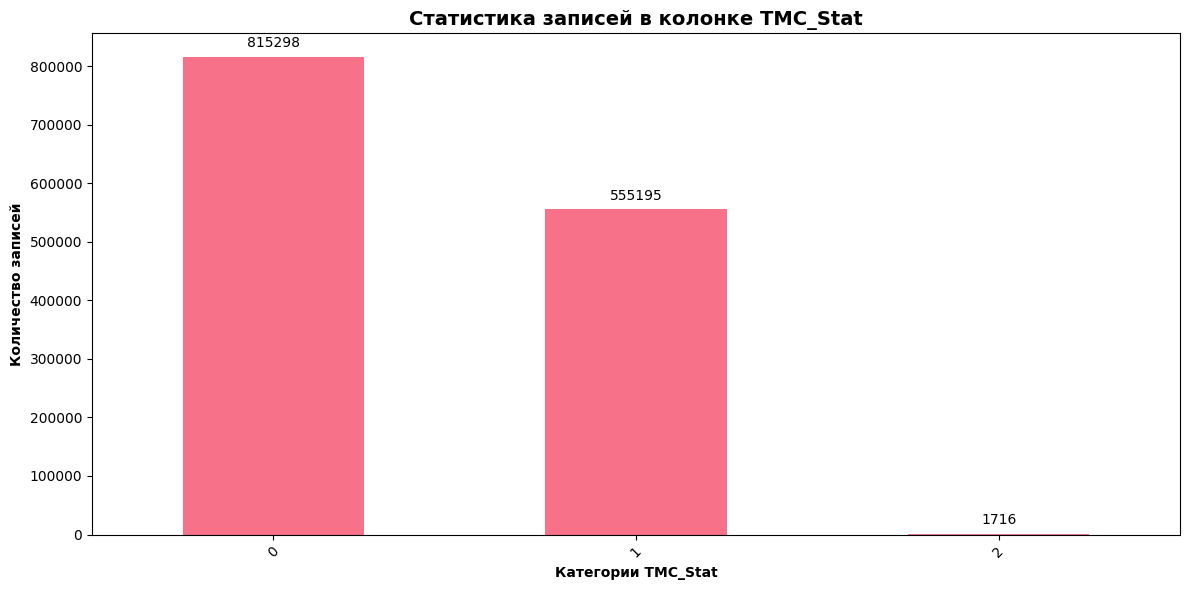

In [50]:
# 1. СТАТИСТИКА КОЛОНКИ TMC_Stat
print("1. СТАТИСТИКА КОЛОНКИ TMC_Stat")
print("-" * 50)

tmc_stat_counts = df['TMC_Stat'].value_counts()
tmc_stat_percentage = df['TMC_Stat'].value_counts(normalize=True) * 100

print(f"Всего уникальных категорий: {len(tmc_stat_counts)}")
print("\nРаспределение по категориям:")
for category, count in tmc_stat_counts.items():
    percentage = tmc_stat_percentage[category]
    print(f"  {category}: {count} записей ({percentage:.1f}%)")

# Столбчатая диаграмма для TMC_Stat
plt.figure(figsize=(12, 6))
ax = tmc_stat_counts.plot(kind='bar')
plt.title('Статистика записей в колонке TMC_Stat', fontsize=14, fontweight='bold')
plt.xlabel('Категории TMC_Stat', fontweight='bold')
plt.ylabel('Количество записей', fontweight='bold')
plt.xticks(rotation=45)

# Добавляем числовые значения
add_value_labels(ax)

plt.tight_layout()
plt.show()
print()

In [51]:
# 2. СОЗДАНИЕ ДАТАФРЕЙМА ETALON
print("2. СОЗДАНИЕ ДАТАФРЕЙМА ETALON")
print("-" * 50)

if 'COMMENT' in df.columns:
    etalon_mask = (df['COMMENT'].str.contains('Эталонная запись', na=False) | 
                   df['COMMENT'].str.contains('Эталонные записи', na=False) |
                   df['COMMENT'].str.contains('Эталон', na=False))
    etalon = df[etalon_mask].copy()
    
    print(f"Найдено эталонных записей: {len(etalon)} ({len(etalon)/len(df)*100:.2f}% от общего числа)")
    
    if len(etalon) > 0:
        print("Распределение эталонных записей по TMC_Stat:")
        etalon_tmc_stat = etalon['TMC_Stat'].value_counts()
        for category, count in etalon_tmc_stat.items():
            percentage = count/len(etalon) * 100
            print(f"  {category}: {count} записей ({percentage:.1f}%)")
    else:
        print("Эталонные записи не найдены")
else:
    print("Колонка COMMENT не найдена в датафрейме")
    etalon = pd.DataFrame()
print()

2. СОЗДАНИЕ ДАТАФРЕЙМА ETALON
--------------------------------------------------
Найдено эталонных записей: 105991 (7.72% от общего числа)
Распределение эталонных записей по TMC_Stat:
  0: 105906 записей (99.9%)
  1: 84 записей (0.1%)
  2: 1 записей (0.0%)



3. АНАЛИЗ НЕЭТАЛОННЫХ ЗАПИСЕЙ
--------------------------------------------------
Неэталонных записей: 1266218 (92.28% от общего числа)


<Figure size 1400x800 with 0 Axes>

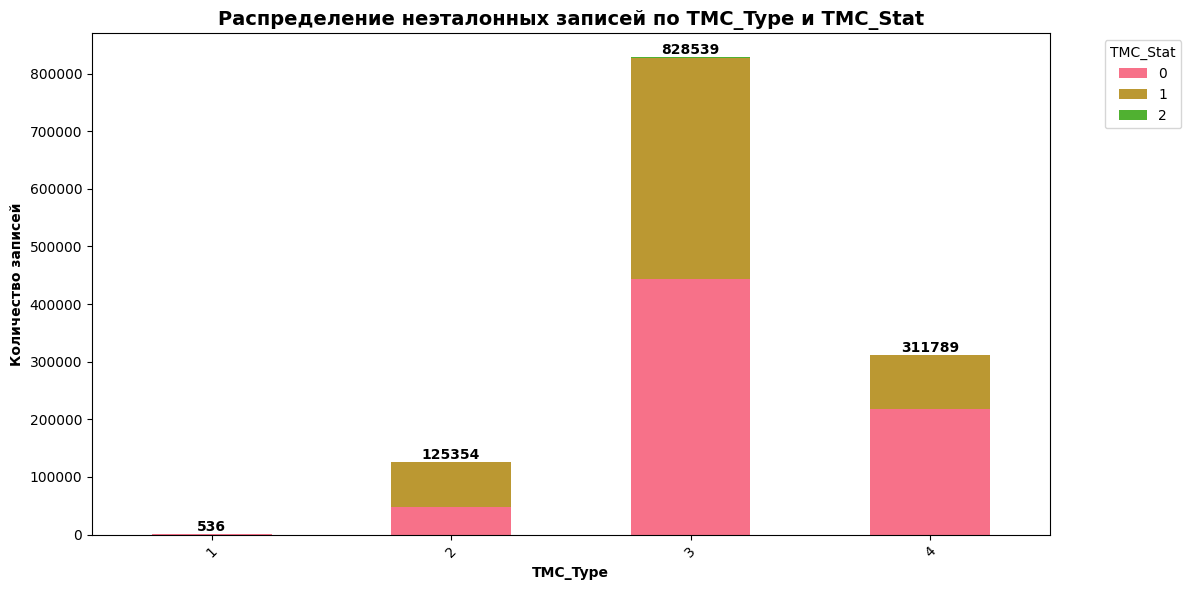


Комбинации TMC_Type + TMC_Stat:
  3 + 0: 443440 записей
  3 + 1: 383775 записей
  4 + 0: 217219 записей
  4 + 1: 94290 записей
  2 + 1: 76960 записей
  2 + 0: 48315 записей
  3 + 2: 1324 записей
  1 + 0: 418 записей
  4 + 2: 280 записей
  1 + 1: 86 записей
  2 + 2: 79 записей
  1 + 2: 32 записей



In [52]:
# 3. АНАЛИЗ НЕЭТАЛОННЫХ ЗАПИСЕЙ
print("3. АНАЛИЗ НЕЭТАЛОННЫХ ЗАПИСЕЙ")
print("-" * 50)

if len(etalon) > 0:
    non_etalon = df[~df.index.isin(etalon.index)]
    print(f"Неэталонных записей: {len(non_etalon)} ({len(non_etalon)/len(df)*100:.2f}% от общего числа)")
    
    # Статистика по TMC_Type и TMC_Stat
    type_stat_counts = non_etalon.groupby(['TMC_Type', 'TMC_Stat']).size().unstack(fill_value=0)
    
    # График для неэталонных записей
    plt.figure(figsize=(14, 8))
    ax = type_stat_counts.plot(kind='bar', stacked=True)
    plt.title('Распределение неэталонных записей по TMC_Type и TMC_Stat', fontsize=14, fontweight='bold')
    plt.xlabel('TMC_Type', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(title='TMC_Stat', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Добавляем числовые значения (для общего количества по TMC_Type)
    for i, (idx, row) in enumerate(type_stat_counts.iterrows()):
        total = row.sum()
        if total > 0:
            plt.text(i, total + 5, f'{int(total)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nКомбинации TMC_Type + TMC_Stat:")
    combined_stats = non_etalon.groupby(['TMC_Type', 'TMC_Stat']).size().sort_values(ascending=False).head(12)
    for (tmc_type, tmc_stat), count in combined_stats.items():
        print(f"  {tmc_type} + {tmc_stat}: {count} записей")
else:
    non_etalon = df
    print("Эталонные записи не найдены, анализируем весь датафрейм")
print()

4. АНАЛИЗ ОШИБОК СБОРКИ В ЭТАЛОННЫХ ЗАПИСЯХ
--------------------------------------------------
Найдено записей с ошибками сборки: 1051 (1.1% от эталонных)
Несовпадение SHORT_NAME: 1002 записей
Несовпадение FULL_NAME: 1004 записей


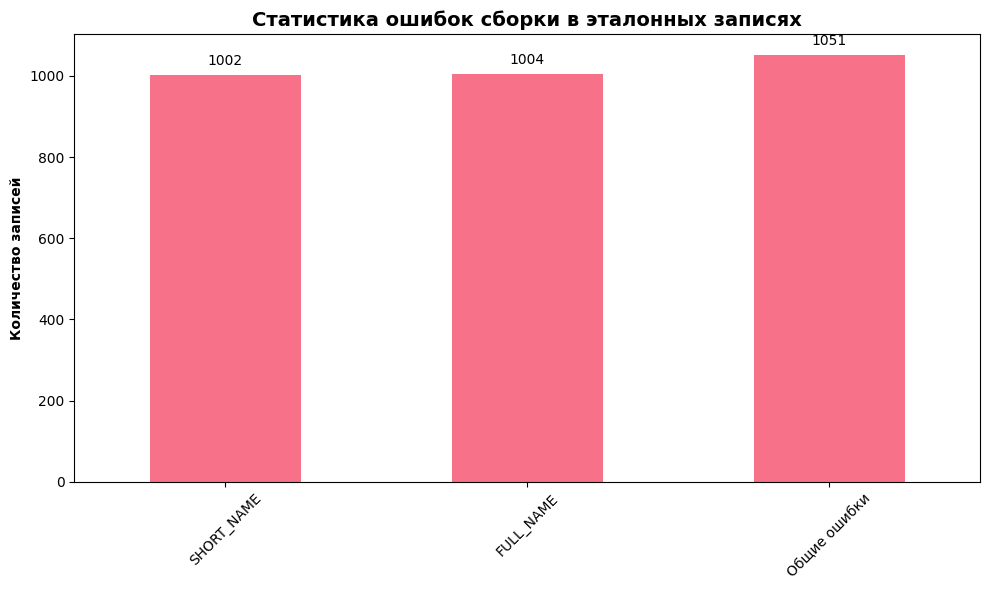


Распределение ошибок по TMC_Stat:
  0: 1050 записей
  1: 1 записей



In [34]:
# 4. АНАЛИЗ ОШИБОК СБОРКИ В ЭТАЛОННЫХ ЗАПИСЯХ
print("4. АНАЛИЗ ОШИБОК СБОРКИ В ЭТАЛОННЫХ ЗАПИСЯХ")
print("-" * 50)

if len(etalon) > 0:
    required_cols = ['SHORT_NAME/ru_RU', 'AUTO_SHORT_NAME', 'FULL_NAME/ru_RU', 'AUTO_FULL_NAME']
    missing_cols = [col for col in required_cols if col not in etalon.columns]
    
    if not missing_cols:
        short_name_mismatch = etalon['SHORT_NAME/ru_RU'] != etalon['AUTO_SHORT_NAME']
        full_name_mismatch = etalon['FULL_NAME/ru_RU'] != etalon['AUTO_FULL_NAME']
        
        oshibka_sborki = etalon[short_name_mismatch | full_name_mismatch].copy()
        
        print(f"Найдено записей с ошибками сборки: {len(oshibka_sborki)} ({len(oshibka_sborki)/len(etalon)*100:.1f}% от эталонных)")
        print(f"Несовпадение SHORT_NAME: {short_name_mismatch.sum()} записей")
        print(f"Несовпадение FULL_NAME: {full_name_mismatch.sum()} записей")
        
        # Статистика ошибок для графика
        error_data = {
            'SHORT_NAME': short_name_mismatch.sum(),
            'FULL_NAME': full_name_mismatch.sum(),
            'Общие ошибки': len(oshibka_sborki)
        }
        
        plt.figure(figsize=(10, 6))
        ax = pd.Series(error_data).plot(kind='bar')
        plt.title('Статистика ошибок сборки в эталонных записях', fontsize=14, fontweight='bold')
        plt.ylabel('Количество записей', fontweight='bold')
        plt.xticks(rotation=45)
        
        add_value_labels(ax)
        plt.tight_layout()
        plt.show()
        
        if len(oshibka_sborki) > 0:
            print("\nРаспределение ошибок по TMC_Stat:")
            error_by_stat = oshibka_sborki['TMC_Stat'].value_counts()
            for category, count in error_by_stat.items():
                print(f"  {category}: {count} записей")
    else:
        print(f"Отсутствуют необходимые колонки: {missing_cols}")
        oshibka_sborki = pd.DataFrame()
else:
    oshibka_sborki = pd.DataFrame()
    print("Нет эталонных записей для анализа ошибок сборки")
print()

5. АНАЛИЗ TRU_SAP_ID
--------------------------------------------------
Статистика количества значений в TRU_SAP_ID:
  0 значений: 172382 записей (12.6%)
  1 значений: 1031050 записей (75.1%)
  2 значений: 130722 записей (9.5%)
  3 значений: 10484 записей (0.8%)
  4 значений: 17427 записей (1.3%)
  5 значений: 9376 записей (0.7%)
  6 значений: 61 записей (0.0%)
  7 значений: 692 записей (0.1%)
  14 значений: 15 записей (0.0%)


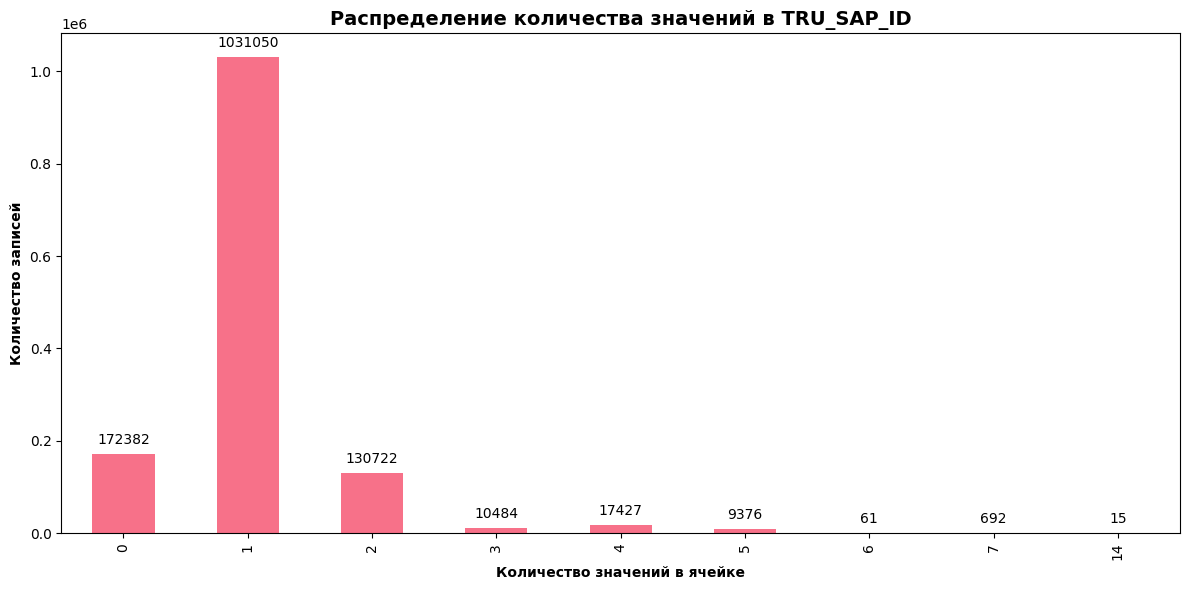

Максимальное количество значений: 14



In [56]:
# 5. АНАЛИЗ TRU_SAP_ID
print("5. АНАЛИЗ TRU_SAP_ID")
print("-" * 50)

if 'TRU_SAP_ID' in df.columns:
    def count_values(cell):
        if pd.isna(cell) or cell == '':
            return 0
        return len(str(cell).split('|'))
    
    df['TRU_SAP_ID_count'] = df['TRU_SAP_ID'].apply(count_values)
    tru_sap_stats = df['TRU_SAP_ID_count'].value_counts().sort_index()
    
    print("Статистика количества значений в TRU_SAP_ID:")
    total_cells = len(df)
    for count_val, freq in tru_sap_stats.items():
        percentage = freq / total_cells * 100
        print(f"  {count_val} значений: {freq} записей ({percentage:.1f}%)")
    #print(f"Максимальное количество значений: {max_values}")
    # График распределения
    plt.figure(figsize=(12, 6))
    ax = tru_sap_stats.plot(kind='bar')
    plt.title('Распределение количества значений в TRU_SAP_ID', fontsize=14, fontweight='bold')
    plt.xlabel('Количество значений в ячейке', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()
    
    # Дополнительная статистика
    avg_values = df['TRU_SAP_ID_count'].mean()
    max_values = df['TRU_SAP_ID_count'].max()
    #print(f"Среднее количество значений: {avg_values:.2f}")
    print(f"Максимальное количество значений: {max_values}")
else:
    print("Колонка TRU_SAP_ID не найдена в датафрейме")
print()

6. АНАЛИЗ TRU_EXCEPTION_SAP_ID
--------------------------------------------------
Статистика количества значений в TRU_EXCEPTION_SAP_ID:
  0 значений: 784642 записей (57.2%)
  1 значений: 403272 записей (29.4%)
  2 значений: 106789 записей (7.8%)
  3 значений: 50845 записей (3.7%)
  4 значений: 17260 записей (1.3%)
  5 значений: 5031 записей (0.4%)
  6 значений: 4325 записей (0.3%)
  7 значений: 40 записей (0.0%)
  8 значений: 2 записей (0.0%)
  10 значений: 2 записей (0.0%)
  23 значений: 1 записей (0.0%)
Проблемных записей в TRU_EXCEPTION: 386364 (28.16%)


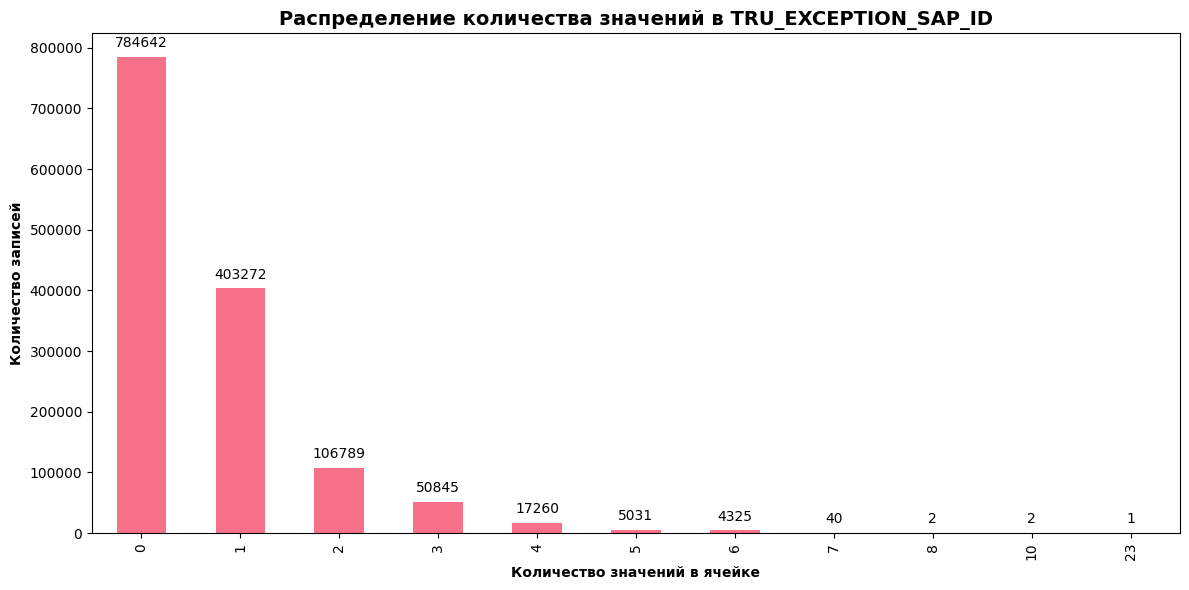

In [54]:
# 6. АНАЛИЗ TRU_EXCEPTION_SAP_ID
print("6. АНАЛИЗ TRU_EXCEPTION_SAP_ID")
print("-" * 50)

if 'TRU_EXCEPTION_SAP_ID' in df.columns:
    df['TRU_EXCEPTION_count'] = df['TRU_EXCEPTION_SAP_ID'].apply(count_values)
    tru_exception_stats = df['TRU_EXCEPTION_count'].value_counts().sort_index()
    
    print("Статистика количества значений в TRU_EXCEPTION_SAP_ID:")
    for count_val, freq in tru_exception_stats.items():
        percentage = freq / total_cells * 100
        print(f"  {count_val} значений: {freq} записей ({percentage:.1f}%)")
    
    # Создание датафрейма bad_tru_exception
    bad_tru_exception = df[df['TRU_EXCEPTION_count'] > 1].copy()
    
    # Проверка для записей с одним значением
    if 'TRU_SAP_ID' in df.columns:
        single_value_mask = df['TRU_EXCEPTION_count'] == 1
        single_value_records = df[single_value_mask]
        
        # Получение всех значений TRU_SAP_ID
        all_tru_sap_ids = set()
        for value in df['TRU_SAP_ID'].dropna():
            all_tru_sap_ids.update(str(value).split('|'))
        
        # Проверка наличия значений TRU_EXCEPTION_SAP_ID в TRU_SAP_ID
        missing_records = []
        for idx, row in single_value_records.iterrows():
            exception_value = str(row['TRU_EXCEPTION_SAP_ID']).strip()
            if exception_value and exception_value not in all_tru_sap_ids:
                missing_records.append(idx)
        
        # Добавление записей с отсутствующими значениями
        additional_bad_records = df.loc[missing_records]
        bad_tru_exception = pd.concat([bad_tru_exception, additional_bad_records]).drop_duplicates()
    
    print(f"Проблемных записей в TRU_EXCEPTION: {len(bad_tru_exception)} ({len(bad_tru_exception)/len(df)*100:.2f}%)")
    
    # График распределения
    plt.figure(figsize=(12, 6))
    ax = tru_exception_stats.plot(kind='bar')
    plt.title('Распределение количества значений в TRU_EXCEPTION_SAP_ID', fontsize=14, fontweight='bold')
    plt.xlabel('Количество значений в ячейке', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()
    
else:
    print("Колонка TRU_EXCEPTION_SAP_ID не найдена в датафрейме")
    bad_tru_exception = pd.DataFrame()
print()

In [10]:
# 7. АНАЛИЗ ПОДСТРОКИ "НА БЛОК" В HIERARCHY_MTR_NAME
print("7. АНАЛИЗ ПОДСТРОКИ 'НА БЛОК' В HIERARCHY_MTR_NAME во всем датасете")
print("-" * 50)

# Проверяем наличие колонки
if 'Hierarchy_MTR_Name' in df.columns:
    na_blok_mask = df['Hierarchy_MTR_Name'].str.contains('На Блок', na=False)
    na_blok_count = na_blok_mask.sum()
    na_blok_by_category = df[na_blok_mask].groupby('TMC_Stat').size()
    
    print(f"Всего записей с 'На блок': {na_blok_count} ({na_blok_count/len(df)*100:.1f}% от общего числа)")
    print("\nРаспределение по категориям TMC_Stat:")
    for category, count in na_blok_by_category.items():
        percentage = count/na_blok_count * 100 if na_blok_count > 0 else 0
        print(f"  {category}: {count} записей ({percentage:.1f}%)")
else:
    print("Колонка Hierarchy_MTR_Name не найдена в датафрейме")
block_df = df[na_blok_mask]
print()

7. АНАЛИЗ ПОДСТРОКИ 'НА БЛОК' В HIERARCHY_MTR_NAME во всем датасете
--------------------------------------------------
Всего записей с 'На блок': 47799 (3.5% от общего числа)

Распределение по категориям TMC_Stat:
  0: 46009 записей (96.3%)
  1: 1763 записей (3.7%)
  2: 27 записей (0.1%)



In [40]:
block_df_un = block_df['Hierarchy_MTR_Name'].value_counts(dropna=False)

In [44]:
#pd.set_option('display.max_rows',60)
print(block_df_un.to_string)

<bound method Series.to_string of Hierarchy_MTR_Name
[На Блок] Отводы для трубопроводов с покрытием        20861
[На Блок] Отводы для трубопроводов без покрытия       10369
[На Блок] Тройники для трубопроводов без покрытия      4381
[На Блок] Опоры, подвески трубопроводов                2893
[На Блок] катализаторы                                 1381
                                                      ...  
[На Блок] материалы прокладочные асбестовые               1
[На Блок] Оксиды неорганич., пероксиды, озониды           1
[На Блок] Эфиры простые, эпоксиды                         1
[На Блок] клеи                                            1
[На Блок] Сырье полимер. и материалы полимеризации        1
Name: count, Length: 77, dtype: int64>


In [45]:
block_df.to_excel('на_блок.xlsx')

In [47]:
# 8. АНАЛИЗ ПОДСТРОКИ "НА БЛОК" В HIERARCHY_MTR_NAME
print("8. АНАЛИЗ ПОДСТРОКИ 'НА БЛОК' В HIERARCHY_MTR_NAME в эталонных записях")
print("-" * 50)

# Проверяем наличие колонки
if 'Hierarchy_MTR_Name' in etalon.columns:
    na_blok_mask = etalon['Hierarchy_MTR_Name'].str.contains('На Блок', na=False)
    na_blok_count = na_blok_mask.sum()
    na_blok_by_category = etalon[na_blok_mask].groupby('TMC_Stat').size()
    
    print(f"Всего записей с 'На блок': {na_blok_count} ({na_blok_count/len(etalon)*100:.1f}% от общего числа)")
    print("\nРаспределение по категориям TMC_Stat:")
    for category, count in na_blok_by_category.items():
        percentage = count/na_blok_count * 100 if na_blok_count > 0 else 0
        print(f"  {category}: {count} записей ({percentage:.1f}%)")
else:
    print("Колонка Hierarchy_MTR_Name не найдена в датафрейме")
block_etalon_df = etalon[na_blok_mask]
print()

8. АНАЛИЗ ПОДСТРОКИ 'НА БЛОК' В HIERARCHY_MTR_NAME в эталонных записях
--------------------------------------------------
Всего записей с 'На блок': 21 (0.0% от общего числа)

Распределение по категориям TMC_Stat:
  0: 21 записей (100.0%)



In [42]:
# 9. ФИНАЛЬНАЯ СТАТИСТИКА
print("9. ФИНАЛЬНАЯ СТАТИСТИКА")
print("-" * 50)

# Добавление флагов в исходный датафрейм
df['is_etalon'] = df.index.isin(etalon.index) if len(etalon) > 0 else False
df['is_oshibka_sborki'] = df.index.isin(oshibka_sborki.index) if len(oshibka_sborki) > 0 else False
df['is_block_category'] = df.index.isin(block_df.index) if len(block_df) > 0 else False
# Создание комплексного отчета
if all(col in df.columns for col in ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name', 'TMC_Stat', 'TMC_Type']):
    final_stats = df.groupby([
        'Hierarchy_MTR_Class', 
        'Hierarchy_MTR_Name', 
        'TMC_Stat', 
        'TMC_Type',
        'is_etalon',
        'is_oshibka_sborki',
        'is_block_category'
    ]).size().reset_index(name='count')
    
    print(f"Создан комплексный отчет с {len(final_stats)} уникальными комбинациями")
    print("\nТоп-10 самых частых комбинаций:")
    top_combinations = final_stats.nlargest(10, 'count')
    for idx, row in top_combinations.iterrows():
        print(f"  {row['Hierarchy_MTR_Class']} | {row['TMC_Stat']} | {row['TMC_Type']} | {row['is_etalon']} | {row['is_oshibka_sborki']} | {row['is_block_category']}: {row['count']} зап.")
else:
    final_stats = pd.DataFrame()
    print("Не все необходимые колонки найдены для комплексного отчета")

9. ФИНАЛЬНАЯ СТАТИСТИКА
--------------------------------------------------
Создан комплексный отчет с 7906 уникальными комбинациями

Топ-10 самых частых комбинаций:
  983300000000000.0 | 1 | 4 | False | False | False: 20673 зап.
  701080800000000.0 | 0 | 3 | False | False | False: 11802 зап.
  2005080106000000.0 | 0 | 3 | True | False | False: 8579 зап.
  702131600000000.0 | 0 | 3 | False | False | False: 6409 зап.
  701110500000000.0 | 0 | 3 | False | False | False: 5928 зап.
  701030100000000.0 | 0 | 3 | False | False | False: 5604 зап.
  980500000000000.0 | 1 | 4 | False | False | False: 5430 зап.
  701090900000000.0 | 0 | 2 | False | False | False: 5201 зап.
  701090900000000.0 | 0 | 3 | False | False | False: 5174 зап.
  2005080110000000.0 | 0 | 3 | True | False | False: 5152 зап.


In [94]:
# УДАЛЕНИЕ "[X]" ИЗ HIERARCHY_MTR_NAME
print("УДАЛЕНИЕ '[X]' ИЗ HIERARCHY_MTR_NAME")
print("-" * 40)

# Проверяем наличие колонки
if 'Hierarchy_MTR_Name' in df.columns:
    # Сохраняем оригинальные значения для сравнения
    original_sample = df['Hierarchy_MTR_Name'].head(5).tolist()
    
    # Удаляем "[X]" из всех значений
    df['Hierarchy_MTR_Name'] = df['Hierarchy_MTR_Name'].astype(str).str.replace(r'\[.*?\]', '', regex=True).str.strip()
    
    # Выводим результаты
    print("Примеры преобразования:")
    for i, (orig, new) in enumerate(zip(original_sample, df['Hierarchy_MTR_Name'].head(5))):
        print(f"  {i+1}. Было: '{orig}'")
        print(f"     Стало: '{new}'")
        print()
    
    # Статистика
    changed_count = (df['Hierarchy_MTR_Name'].astype(str) != df['Hierarchy_MTR_Name'].astype(str)).sum()
    print(f"Всего записей изменено: {changed_count}")
    print(f"Всего записей в колонке: {len(df)}")
    
else:
    print("Колонка 'Hierarchy_MTR_Name' не найдена в датафрейме")


УДАЛЕНИЕ '[X]' ИЗ HIERARCHY_MTR_NAME
----------------------------------------
Примеры преобразования:
  1. Было: 'Канцелярские товары'
     Стало: 'Канцелярские товары'

  2. Было: 'Канцелярские товары'
     Стало: 'Канцелярские товары'

  3. Было: 'Узлы и компл. д/нест. оборуд. прочие'
     Стало: 'Узлы и компл. д/нест. оборуд. прочие'

  4. Было: 'Мебель и предметы интерьера'
     Стало: 'Мебель и предметы интерьера'

  5. Было: 'Мебель и предметы интерьера'
     Стало: 'Мебель и предметы интерьера'

Всего записей изменено: 0
Всего записей в колонке: 581137


In [ ]:
# ДОПОЛНИТЕЛЬНАЯ ЯЧЕЙКА - ИСПРАВЛЕННОЕ СРАВНЕНИЕ ДАТАФРЕЙМОВ С УЧЕТОМ ТИПОВ ДАННЫХ
print("10. ИСПРАВЛЕННОЕ СРАВНЕНИЕ ДАТАФРЕЙМОВ (УЧЕТ ТИПОВ ДАННЫХ)")
print("-" * 60)

# Предположим, что второй датафрейм уже загружен в переменную df_classes
# с колонками: CSCD_ID, HIERARCHY_MTR/CSCD_ID, NAME

# Переименуем колонки для удобства
df_classes_clean = df_classes.rename(columns={
    'HIERARCHY_MTR/CSCD_ID': 'HIERARCHY_MTR_CSCD_ID'
})

print(f"Размер датафрейма классов: {df_classes_clean.shape}")
print(f"Колонки в датафрейме классов: {list(df_classes_clean.columns)}")
print()

# Проверяем наличие необходимых колонок
required_cols_main = ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name']
required_cols_classes = ['HIERARCHY_MTR_CSCD_ID', 'NAME']

if all(col in df.columns for col in required_cols_main) and all(col in df_classes_clean.columns for col in required_cols_classes):
    
    # Создаем копии для безопасной работы
    df_main_clean = df[required_cols_main].copy()
    df_classes_clean = df_classes_clean[required_cols_classes].copy()
    
    # ДИАГНОСТИКА: выводим информацию о типах данных
    print("ДИАГНОСТИКА ТИПОВ ДАННЫХ:")
    print(f"Тип Hierarchy_MTR_Class в основном датафрейме: {df_main_clean['Hierarchy_MTR_Class'].dtype}")
    print(f"Тип HIERARCHY_MTR_CSCD_ID в датафрейме классов: {df_classes_clean['HIERARCHY_MTR_CSCD_ID'].dtype}")
    print()
    
    # ПРЕОБРАЗОВАНИЕ ТИПОВ ДАННЫХ
    print("ПРЕОБРАЗОВАНИЕ ТИПОВ ДАННЫХ...")
    
    # Преобразуем оба столбца к строковому типу и очищаем от пробелов
    df_main_clean['Hierarchy_MTR_Class'] = df_main_clean['Hierarchy_MTR_Class'].astype(str).str.strip()
    df_classes_clean['HIERARCHY_MTR_CSCD_ID'] = df_classes_clean['HIERARCHY_MTR_CSCD_ID'].astype(str).str.strip()
    
    # Также очищаем текстовые колонки
    df_main_clean['Hierarchy_MTR_Name'] = df_main_clean['Hierarchy_MTR_Name'].astype(str).str.strip()
    df_classes_clean['NAME'] = df_classes_clean['NAME'].astype(str).str.strip()
    
    print("После преобразования типов:")
    print(f"Тип Hierarchy_MTR_Class: {df_main_clean['Hierarchy_MTR_Class'].dtype}")
    print(f"Тип HIERARCHY_MTR_CSCD_ID: {df_classes_clean['HIERARCHY_MTR_CSCD_ID'].dtype}")
    print()
    
    # ДИАГНОСТИКА: выводим примеры данных после преобразования
    print("ПРИМЕРЫ ДАННЫХ ПОСЛЕ ПРЕОБРАЗОВАНИЯ:")
    print("Основной датафрейм (первые 3):")
    print(df_main_clean.head(3))
    print("\nДатафрейм классов (первые 3):")
    print(df_classes_clean.head(3))
    print()
    
    # Проверяем пересечение классов после преобразования
    main_classes = set(df_main_clean['Hierarchy_MTR_Class'].unique())
    class_classes = set(df_classes_clean['HIERARCHY_MTR_CSCD_ID'].unique())
    
    common_classes = main_classes.intersection(class_classes)
    print(f"Пересекающиеся классы после преобразования типов: {len(common_classes)}")
    
    if common_classes:
        print(f"Примеры общих классов: {list(common_classes)[:10]}")
        
        # Показываем примеры соответствий
        print(f"\nПРИМЕРЫ СООТВЕТСТВИЙ:")
        sample_class = list(common_classes)[0]
        main_sample = df_main_clean[df_main_clean['Hierarchy_MTR_Class'] == sample_class].head(1)
        class_sample = df_classes_clean[df_classes_clean['HIERARCHY_MTR_CSCD_ID'] == sample_class].head(1)
        
        if not main_sample.empty and not class_sample.empty:
            print(f"Класс: {sample_class}")
            print(f"  Основной датафрейм: '{main_sample['Hierarchy_MTR_Name'].iloc[0]}'")
            print(f"  Справочник: '{class_sample['NAME'].iloc[0]}'")
            print(f"  Совпадают: {main_sample['Hierarchy_MTR_Name'].iloc[0] == class_sample['NAME'].iloc[0]}")
    else:
        print("НЕТ ПЕРЕСЕКАЮЩИХСЯ КЛАССОВ!")
        print("Возможные причины:")
        print("1. Разные идентификаторы (например, с ведущими нулями)")
        print("2. Проблемы с преобразованием типов")
        print("3. Действительно нет общих классов")
        
        # Дополнительная диагностика
        print(f"\nДОПОЛНИТЕЛЬНАЯ ДИАГНОСТИКА:")
        print(f"Всего классов в основном датафрейме: {len(main_classes)}")
        print(f"Всего классов в справочнике: {len(class_classes)}")
        
        # Проверяем конкретные примеры
        sample_main = list(main_classes)[:3]
        sample_class = list(class_classes)[:3]
        print(f"Примеры из основного датафрейма: {sample_main}")
        print(f"Примеры из справочника: {sample_class}")
        
        # Проверяем есть ли числовые представления
        print(f"\nПроверка числовых представлений:")
        for class_id in sample_main:
            try:
                # Пробуем преобразовать к числу и обратно к строке
                numeric_version = str(int(float(class_id)))
                print(f"  '{class_id}' -> числовое представление: '{numeric_version}'")
            except:
                print(f"  '{class_id}' -> невозможно преобразовать к числу")
    
    print()
    
    # ОБЪЕДИНЕНИЕ ДАТАФРЕЙМОВ
    if common_classes:
        comparison_df = df_main_clean.merge(
            df_classes_clean, 
            left_on='Hierarchy_MTR_Class', 
            right_on='HIERARCHY_MTR_CSCD_ID', 
            how='inner',  # Только совпадающие записи
            suffixes=('_main', '_class')
        )
        
        print(f"После INNER JOIN объединения: {len(comparison_df)} записей")
        
        if len(comparison_df) > 0:
            # СРАВНЕНИЕ ИМЕН
            exact_mismatch = comparison_df['Hierarchy_MTR_Name_main'] != comparison_df['NAME_class']
            mismatch_records = comparison_df[exact_mismatch].copy()
            
            print(f"Записей с несовпадающими именами: {len(mismatch_records)}")
            print(f"Процент несовпадений: {len(mismatch_records)/len(comparison_df)*100:.2f}%")
            
            if len(mismatch_records) > 0:
                # Создаем финальный датафрейм для сохранения
                hierarchy_mismatch = mismatch_records[[
                    'Hierarchy_MTR_Class', 
                    'Hierarchy_MTR_Name_main', 
                    'NAME_class'
                ]].rename(columns={
                    'Hierarchy_MTR_Class': 'Hierarchy_MTR_Class',
                    'Hierarchy_MTR_Name_main': 'Hierarchy_MTR_Name_Actual',
                    'NAME_class': 'Hierarchy_MTR_Name_Expected'
                })
                
                hierarchy_mismatch['Mismatch_Type'] = 'Name Mismatch'
                
                # Дополнительный анализ
                hierarchy_mismatch['Actual_Length'] = hierarchy_mismatch['Hierarchy_MTR_Name_Actual'].str.len()
                hierarchy_mismatch['Expected_Length'] = hierarchy_mismatch['Hierarchy_MTR_Name_Expected'].str.len()
                hierarchy_mismatch['Length_Difference'] = hierarchy_mismatch['Actual_Length'] - hierarchy_mismatch['Expected_Length']
                
                # Статистика
                print(f"\nСТАТИСТИКА НЕСОВПАДЕНИЙ:")
                print(f"Уникальных классов с несовпадениями: {hierarchy_mismatch['Hierarchy_MTR_Class'].nunique()}")
                
                # Топ несовпадений
                top_mismatches = hierarchy_mismatch['Hierarchy_MTR_Class'].value_counts().head(10)
                print(f"\nТоп-10 классов с несовпадениями:")
                for class_id, count in top_mismatches.items():
                    percentage = count/len(mismatch_records) * 100
                    print(f"  {class_id}: {count} несовпадений ({percentage:.1f}%)")
                
                # График
                plt.figure(figsize=(14, 8))
                top_15 = hierarchy_mismatch['Hierarchy_MTR_Class'].value_counts().head(15)
                ax = top_15.plot(kind='bar', color='lightcoral')
                plt.title('Топ-15 классов с несовпадающими именами', fontsize=14, fontweight='bold')
                plt.xlabel('ID Класса', fontweight='bold')
                plt.ylabel('Количество несовпадений', fontweight='bold')
                plt.xticks(rotation=45)
                add_value_labels(ax)
                plt.tight_layout()
                plt.show()
                
                # Примеры несовпадений
                print(f"\nПРИМЕРЫ НЕСОВПАДЕНИЙ:")
                for idx, row in hierarchy_mismatch.head(5).iterrows():
                    print(f"  Класс {row['Hierarchy_MTR_Class']}:")
                    print(f"    Фактическое: '{row['Hierarchy_MTR_Name_Actual']}'")
                    print(f"    Ожидаемое:   '{row['Hierarchy_MTR_Name_Expected']}'")
                    print(f"    Совпадают: {row['Hierarchy_MTR_Name_Actual'] == row['Hierarchy_MTR_Name_Expected']}")
                    print()
                
                # Сохраняем
                dataframes_to_save['hierarchy_mismatch'] = hierarchy_mismatch
                
            else:
                print("ВСЕ ИМЕНА СОВПАДАЮТ! Нет несовпадений.")
                hierarchy_mismatch = pd.DataFrame()
        else:
            print("Нет записей для сравнения после объединения!")
            hierarchy_mismatch = pd.DataFrame()
    else:
        print("Нет общих классов для сравнения!")
        hierarchy_mismatch = pd.DataFrame()
        
else:
    missing_cols_main = [col for col in required_cols_main if col not in df.columns]
    missing_cols_classes = [col for col in required_cols_classes if col not in df_classes_clean.columns]
    
    print("Отсутствуют необходимые колонки:")
    if missing_cols_main:
        print(f"  В основном датафрейме: {missing_cols_main}")
    if missing_cols_classes:
        print(f"  В датафрейме классов: {missing_cols_classes}")
    
    hierarchy_mismatch = pd.DataFrame()

print()


## alt

In [95]:
# ДОПОЛНИТЕЛЬНАЯ ЯЧЕЙКА - АЛЬТЕРНАТИВНОЕ ПРЕОБРАЗОВАНИЕ ЕСЛИ ПЕРВЫЙ ВАРИАНТ НЕ СРАБОТАЛ
print("11. АЛЬТЕРНАТИВНОЕ ПРЕОБРАЗОВАНИЕ ТИПОВ")
print("-" * 50)


# Проверяем наличие необходимых колонок
required_cols_main = ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name']
required_cols_classes = ['HIERARCHY_MTR_CSCD_ID', 'NAME']
if 'hierarchy_mismatch' in locals() and hierarchy_mismatch.empty:
    print("Пробуем альтернативные методы преобразования...")
    
    # Создаем новые копии
    df_main_alt = df[required_cols_main].copy()
    df_classes_alt = df_classes_clean[required_cols_classes].copy()
    
    # МЕТОД 1: Преобразование через float (на случай дробных чисел)
    try:
        df_main_alt['Hierarchy_MTR_Class'] = df_main_alt['Hierarchy_MTR_Class'].astype(float).astype(str).str.strip()
        df_classes_alt['HIERARCHY_MTR_CSCD_ID'] = df_classes_alt['HIERARCHY_MTR_CSCD_ID'].astype(str).str.strip()
        print("Метод 1 (float->str): применен")
    except:
        print("Метод 1: ошибка преобразования")
    
    # МЕТОД 2: Удаление нечисловых символов
    try:
        df_main_alt['Hierarchy_MTR_Class'] = df_main_alt['Hierarchy_MTR_Class'].astype(str).str.replace(r'[^\d.-]', '', regex=True).str.strip()
        df_classes_alt['HIERARCHY_MTR_CSCD_ID'] = df_classes_alt['HIERARCHY_MTR_CSCD_ID'].str.replace(r'[^\d.-]', '', regex=True).str.strip()
        print("Метод 2 (удаление нечисловых): применен")
    except:
        print("Метод 2: ошибка очистки")
    
    # МЕТОД 3: Приведение к целым числам
    try:
        df_main_alt['Hierarchy_MTR_Class'] = df_main_alt['Hierarchy_MTR_Class'].apply(
            lambda x: str(int(float(x))) if pd.notna(x) and str(x).strip() != '' else x
        )
        df_classes_alt['HIERARCHY_MTR_CSCD_ID'] = df_classes_alt['HIERARCHY_MTR_CSCD_ID'].apply(
            lambda x: str(int(float(x))) if pd.notna(x) and str(x).strip() != '' else x
        )
        print("Метод 3 (приведение к int): применен")
    except:
        print("Метод 3: ошибка приведения к int")
    
    # Проверяем пересечение после альтернативных преобразований
    main_alt_classes = set(df_main_alt['Hierarchy_MTR_Class'].unique())
    class_alt_classes = set(df_classes_alt['HIERARCHY_MTR_CSCD_ID'].unique())
    common_alt_classes = main_alt_classes.intersection(class_alt_classes)
    
    print(f"Пересекающиеся классы после альтернативных преобразований: {len(common_alt_classes)}")
    
    if common_alt_classes:
        print(f"УСПЕХ! Найдены общие классы: {list(common_alt_classes)[:5]}")
        
        # Объединяем с альтернативными данными
        comparison_alt = df_main_alt.merge(
            df_classes_alt, 
            left_on='Hierarchy_MTR_Class', 
            right_on='HIERARCHY_MTR_CSCD_ID', 
            how='inner'
        )
        comparison_alt = comparison_alt.drop_duplicates()
        print(f"Объединенных записей: {len(comparison_alt)}")
        
        if len(comparison_alt) > 0:
            # Сравниваем имена
            mismatch_alt = comparison_alt['Hierarchy_MTR_Name'] != comparison_alt['NAME']
            #mismatch_alt.drop_duplicates()
            mismatch_count = mismatch_alt.sum()
            
            print(f"Несовпадений имен: {mismatch_count}")
            
            if mismatch_count > 0:
                hierarchy_mismatch_alt = comparison_alt[mismatch_alt][[
                    'Hierarchy_MTR_Class', 'Hierarchy_MTR_Name', 'NAME'
                ]].rename(columns={
                    'Hierarchy_MTR_Name': 'Hierarchy_MTR_Name_Actual',
                    'NAME': 'Hierarchy_MTR_Name_Expected'
                })
                #dataframes_to_save = {}
                hierarchy_mismatch_alt['Mismatch_Type'] = 'Name Mismatch (Alternative)'
                
                #dataframes_to_save['hierarchy_mismatch_alternative'] = hierarchy_mismatch_alt
                print("Альтернативные несовпадения сохранены!")
                
    else:
        print("Альтернативные методы не помогли найти общие классы.")

print()




11. АЛЬТЕРНАТИВНОЕ ПРЕОБРАЗОВАНИЕ ТИПОВ
--------------------------------------------------
Пробуем альтернативные методы преобразования...
Метод 1 (float->str): применен
Метод 2 (удаление нечисловых): применен
Метод 3 (приведение к int): применен
Пересекающиеся классы после альтернативных преобразований: 2666
УСПЕХ! Найдены общие классы: ['2401060202040000', '2403013401030000', '4001080404020000', '4001080300000000', '602011101020100']
Объединенных записей: 2666
Несовпадений имен: 305
Альтернативные несовпадения сохранены!



In [97]:
hierarchy_mismatch_alt

,Hierarchy_MTR_Class,Hierarchy_MTR_Name_Actual,Hierarchy_MTR_Name_Expected,Mismatch_Type
5,602011107010000,Масла прочие наливные,Продуктовая линейка,Name Mismatch (Alternative)
6,602011107020000,Масла прочие фасованные,Продуктовая линейка,Name Mismatch (Alternative)
10,2401012109010000,Костюм зимний мужской М06-01ИТР-1абж в стиле T...,М06-01ИТР-1абж Teboil Премьер CR 230,Name Mismatch (Alternative)
33,2001020605990000,Части противовыбросового оборудования прочие,Части противовыбр. оборуд. прочие,Name Mismatch (Alternative)
68,2013071203000000,Прокладки для соед. трубопр. фирменн,Прокладки д/соед. трубопр. фирменн,Name Mismatch (Alternative)
...,...,...,...,...
206960,2018030102040000,Посуда лабораторная немерная металлическая,Посуда лабораторная немерная металлич.,Name Mismatch (Alternative)
207545,4001083400000000,"Углеводороды алиф., аром., конден., замещ.","Углевод-ы алиф., аром., конден., замещ.",Name Mismatch (Alternative)
207822,2006010208000000,"Насосы, агрегаты (устан.) оседиагональные","Насосы, агрегаты (устан.) оседиаг.",Name Mismatch (Alternative)
207841,3001020404000000,Ботинки дем. муж. НсНмСжСм,Полуботинки дем. жен. НмСжСмЭс,Name Mismatch (Alternative)


In [66]:
# ДОПОЛНИТЕЛЬНАЯ ДИАГНОСТИКА ЕСЛИ ВСЕ ЕЩЁ НЕТ РЕЗУЛЬТАТОВ
print("11. ДОПОЛНИТЕЛЬНАЯ ДИАГНОСТИКА СРАВНЕНИЯ")
print("-" * 50)

if 'hierarchy_mismatch' in locals() and hierarchy_mismatch.empty:
    print("Проводим дополнительную диагностику...")
    
    # Проверяем данные более тщательно
    print("\nПРОВЕРКА ДАННЫХ:")
    
    # 1. Проверяем наличие пустых значений
    print("1. Пустые значения в основном датафрейме:")
    print(f"   Hierarchy_MTR_Class: {df_main_clean['Hierarchy_MTR_Class'].isna().sum()}")
    print(f"   Hierarchy_MTR_Name: {df_main_clean['Hierarchy_MTR_Name'].isna().sum()}")
    
    print("2. Пустые значения в датафрейме классов:")
    print(f"   HIERARCHY_MTR_CSCD_ID: {df_classes_clean['HIERARCHY_MTR_CSCD_ID'].isna().sum()}")
    print(f"   NAME: {df_classes_clean['NAME'].isna().sum()}")
    
    # 2. Проверяем уникальность
    print(f"\n3. Уникальность в основном датафрейме:")
    print(f"   Уникальных Hierarchy_MTR_Class: {df_main_clean['Hierarchy_MTR_Class'].nunique()}")
    print(f"   Уникальных Hierarchy_MTR_Name: {df_main_clean['Hierarchy_MTR_Name'].nunique()}")
    
    print(f"4. Уникальность в датафрейме классов:")
    print(f"   Уникальных HIERARCHY_MTR_CSCD_ID: {df_classes_clean['HIERARCHY_MTR_CSCD_ID'].nunique()}")
    print(f"   Уникальных NAME: {df_classes_clean['NAME'].nunique()}")
    
    # 3. Пробуем разные стратегии объединения
    print(f"\n5. Пробуем разные стратегии объединения:")
    
    # LEFT JOIN
    left_join = df_main_clean.merge(
        df_classes_clean, 
        left_on='Hierarchy_MTR_Class', 
        right_on='HIERARCHY_MTR_CSCD_ID', 
        how='left'
    )
    print(f"   LEFT JOIN: {len(left_join)} записей")
    print(f"   Найдено соответствий: {left_join['NAME'].notna().sum()}")
    
    # RIGHT JOIN  
    right_join = df_main_clean.merge(
        df_classes_clean, 
        left_on='Hierarchy_MTR_Class', 
        right_on='HIERARCHY_MTR_CSCD_ID', 
        how='right'
    )
    print(f"   RIGHT JOIN: {len(right_join)} записей")
    print(f"   Найдено соответствий: {right_join['Hierarchy_MTR_Name'].notna().sum()}")
    
    # 4. Проверяем конкретные примеры вручную
    print(f"\n6. Ручная проверка примеров:")
    sample_main_classes = df_main_clean['Hierarchy_MTR_Class'].dropna().unique()[:3]
    sample_class_classes = df_classes_clean['HIERARCHY_MTR_CSCD_ID'].dropna().unique()[:3]
    
    print(f"   Примеры классов из основного датафрейма: {sample_main_classes}")
    print(f"   Примеры классов из справочника: {sample_class_classes}")
    
    # Проверяем есть ли эти классы в другом датафрейме
    for class_id in sample_main_classes:
        in_classes = class_id in df_classes_clean['HIERARCHY_MTR_CSCD_ID'].values
        print(f"   Класс '{class_id}' из основного датафрейма {'НАЙДЕН' if in_classes else 'НЕ НАЙДЕН'} в справочнике")
    
    for class_id in sample_class_classes:
        in_main = class_id in df_main_clean['Hierarchy_MTR_Class'].values
        print(f"   Класс '{class_id}' из справочника {'НАЙДЕН' if in_main else 'НЕ НАЙДЕН'} в основном датафрейме")

print()


11. ДОПОЛНИТЕЛЬНАЯ ДИАГНОСТИКА СРАВНЕНИЯ
--------------------------------------------------
Проводим дополнительную диагностику...

ПРОВЕРКА ДАННЫХ:
1. Пустые значения в основном датафрейме:
   Hierarchy_MTR_Class: 0
   Hierarchy_MTR_Name: 3959
2. Пустые значения в датафрейме классов:
   HIERARCHY_MTR_CSCD_ID: 0
   NAME: 0

3. Уникальность в основном датафрейме:
   Уникальных Hierarchy_MTR_Class: 3735
   Уникальных Hierarchy_MTR_Name: 3689
4. Уникальность в датафрейме классов:
   Уникальных HIERARCHY_MTR_CSCD_ID: 2832
   Уникальных NAME: 2808

5. Пробуем разные стратегии объединения:
   LEFT JOIN: 581137 записей
   Найдено соответствий: 0
   RIGHT JOIN: 2832 записей
   Найдено соответствий: 0

6. Ручная проверка примеров:
   Примеры классов из основного датафрейма: ['701110500000000.0' '2002200299000000.0' '701090900000000.0']
   Примеры классов из справочника: ['2013070303000000' '2002010304000000' '2018010100000000']
   Класс '701110500000000.0' из основного датафрейма НЕ НАЙДЕН в сп

In [60]:
comparison_df[comparison_df['Hierarchy_MTR_Class']== 4001080401030000.0]

,Hierarchy_MTR_Class,Hierarchy_MTR_Name,HIERARCHY_MTR_CSCD_ID,NAME


In [41]:
# 11. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
print("\n11. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
print("-" * 50)

# Сбор всех датафреймов для сохранения
dataframes_to_save = {}
if len(etalon) > 0:
    dataframes_to_save['etalon'] = etalon
if len(oshibka_sborki) > 0:
    dataframes_to_save['oshibka_sborki'] = oshibka_sborki
if len(bad_tru_exception) > 0:
    dataframes_to_save['bad_tru_exception'] = bad_tru_exception
if len(final_stats) > 0:
    dataframes_to_save['final_statistics'] = final_stats

# Сохранение (закомментировано, чтобы случайно не перезаписать файлы)
print("Датафреймы готовы к сохранению:")
for name in dataframes_to_save.keys():
    print(f"  - {name}: {len(dataframes_to_save[name])} записей")

print("\nДля сохранения раскомментируйте соответствующие строки в коде")
# Пример сохранения:
for name, dataframe in dataframes_to_save.items():
     dataframe.to_excel(f'{name}.xlsx', index=False)
     print(f"Сохранен: {name}.xlsx")

print("\n" + "=" * 80)
print("АНАЛИЗ ЗАВЕРШЕН!")
print("=" * 80)


10. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
--------------------------------------------------
Датафреймы готовы к сохранению:
  - etalon: 93673 записей
  - oshibka_sborki: 1051 записей
  - bad_tru_exception: 42491 записей
  - final_statistics: 7906 записей

Для сохранения раскомментируйте соответствующие строки в коде
Сохранен: etalon.xlsx
Сохранен: oshibka_sborki.xlsx
Сохранен: bad_tru_exception.xlsx
Сохранен: final_statistics.xlsx

АНАЛИЗ ЗАВЕРШЕН!


In [ ]:
# СВОДНАЯ ИНФОРМАЦИЯ
print("\nСВОДНАЯ ИНФОРМАЦИЯ:")
print(f"Всего записей: {len(df):,}")
if len(etalon) > 0:
    print(f"Эталонные записи: {len(etalon):,} ({len(etalon)/len(df)*100:.2f}%)")
if len(oshibka_sborki) > 0:
    print(f"Записи с ошибками сборки: {len(oshibka_sborki):,} ({len(oshibka_sborki)/len(etalon)*100:.2f}% от эталонных)")
if len(bad_tru_exception) > 0:
    print(f"Проблемные записи TRU_EXCEPTION: {len(bad_tru_exception):,} ({len(bad_tru_exception)/len(df)*100:.2f}%)")

print(f"\nУникальных категорий TMC_Stat: {df['TMC_Stat'].nunique()}")
if 'TMC_Type' in df.columns:
    print(f"Уникальных категорий TMC_Type: {df['TMC_Type'].nunique()}")


СВОДНАЯ ИНФОРМАЦИЯ:
Всего записей: 581,137
Эталонные записи: 93,673 (16.12%)
Записи с ошибками сборки: 1,051 (1.12% от эталонных)
Проблемные записи TRU_EXCEPTION: 42,491 (7.31%)

Уникальных категорий TMC_Stat: 3
Уникальных категорий TMC_Type: 4


In [98]:
# ДОПОЛНИТЕЛЬНАЯ ЯЧЕЙКА - СОЗДАНИЕ ОТДЕЛЬНОГО ФАЙЛА С ГРАФИКАМИ
print("12. СОЗДАНИЕ ФАЙЛА С ВСЕМИ ГРАФИКАМИ")
print("-" * 50)
import openpyxl
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.drawing.image import Image  # ДОБАВЛЕН ЭТОТ ИМПОРТ
from openpyxl.styles import Font, PatternFill, Alignment
from openpyxl.utils.dataframe import dataframe_to_rows
import io
import os

try:
    # Создаем книгу только с графиками
    wb_charts = Workbook()
    wb_charts.remove(wb_charts.active)
    
    # 1. График TMC_Stat
    ws_chart1 = wb_charts.create_sheet("TMC_Stat_график")
    fig, ax = plt.subplots(figsize=(12, 8))
    tmc_stat_counts = df['TMC_Stat'].value_counts()
    bars = ax.bar(range(len(tmc_stat_counts)), tmc_stat_counts.values, color='skyblue')
    ax.set_title('Статистика записей в колонке TMC_Stat', fontsize=14, fontweight='bold')
    ax.set_xlabel('Категории TMC_Stat', fontweight='bold')
    ax.set_ylabel('Количество записей', fontweight='bold')
    ax.set_xticks(range(len(tmc_stat_counts)))
    ax.set_xticklabels(tmc_stat_counts.index, rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    temp_chart = "temp_chart1.png"
    plt.tight_layout()
    plt.savefig(temp_chart, dpi=150, bbox_inches='tight')
    plt.close(fig)
    
    img = Image(temp_chart)
    ws_chart1.add_image(img, 'A1')
    
    # 2. График неэталонных записей (если есть)
    if len(etalon) > 0:
        ws_chart2 = wb_charts.create_sheet("Неэталонные_записи")
        type_stat_counts = non_etalon.groupby(['TMC_Type', 'TMC_Stat']).size().unstack(fill_value=0)
        
        fig, ax = plt.subplots(figsize=(14, 8))
        type_stat_counts.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title('Распределение неэталонных записей по TMC_Type и TMC_Stat', fontsize=14, fontweight='bold')
        ax.set_xlabel('TMC_Type', fontweight='bold')
        ax.set_ylabel('Количество записей', fontweight='bold')
        ax.legend(title='TMC_Stat', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        
        temp_chart2 = "temp_chart2.png"
        plt.tight_layout()
        plt.savefig(temp_chart2, dpi=150, bbox_inches='tight')
        plt.close(fig)
        
        img2 = Image(temp_chart2)
        ws_chart2.add_image(img2, 'A1')
    
    # 3. График несовпадений (если есть)
    if 'hierarchy_mismatch' in dataframes_to_save and not dataframes_to_save['hierarchy_mismatch'].empty:
        ws_chart3 = wb_charts.create_sheet("Несовпадения_имен")
        mismatch_df = dataframes_to_save['hierarchy_mismatch']
        
        fig, ax = plt.subplots(figsize=(14, 8))
        top_mismatches = mismatch_df['Hierarchy_MTR_Class'].value_counts().head(15)
        bars = ax.bar(range(len(top_mismatches)), top_mismatches.values, color='lightcoral')
        ax.set_title('Топ-15 классов с несовпадающими именами', fontsize=14, fontweight='bold')
        ax.set_xlabel('ID Класса', fontweight='bold')
        ax.set_ylabel('Количество несовпадений', fontweight='bold')
        ax.set_xticks(range(len(top_mismatches)))
        ax.set_xticklabels(top_mismatches.index, rotation=45, ha='right')
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
        
        temp_chart3 = "temp_chart3.png"
        plt.tight_layout()
        plt.savefig(temp_chart3, dpi=150, bbox_inches='tight')
        plt.close(fig)
        
        img3 = Image(temp_chart3)
        ws_chart3.add_image(img3, 'A1')
    
    # Сохраняем файл с графиками
    charts_path = 'all_charts.xlsx'
    wb_charts.save(charts_path)
    
    # Удаляем временные файлы
    temp_files = [f for f in os.listdir() if f.startswith('temp_') and f.endswith('.png')]
    for temp_file in temp_files:
        try:
            os.remove(temp_file)
        except:
            pass
    
    print(f"Файл со всеми графиками создан: {charts_path}")
    print(f"Количество графиков: {len(wb_charts.sheetnames)}")
    
except Exception as e:
    print(f"Ошибка при создании файла с графиками: {e}")

print()



12. СОЗДАНИЕ ФАЙЛА С ВСЕМИ ГРАФИКАМИ
--------------------------------------------------
Файл со всеми графиками создан: all_charts.xlsx
Количество графиков: 2



## Версия 2

In [31]:
df_classes_load = pd.read_excel('shablon.xlsx')
df_classes_load.head(10)

,CSCD_ID,HIERARCHY_MTR/CSCD_ID,NAME
0,102006,2013070303000000,Тройники фирменные
1,101624,2002010304000000,Штропы
2,101722,2018010100000000,Инструменты захвата лабораторные
3,992,2014112200000000,Подрозетники и рамки
4,101539,2001020630040000,Детали и запчасти сист.бур.сточных вод
5,101554,2009021500000000,Техника вибрационного типа
6,102249,2002130410080000,Узлы теплообмен. и котельного оборуд.
7,102369,2007052600000000,Устройства и блоки зарядные
8,101403,2003010300000000,"Уст-ва, приборы анестезиолог., реанимац."
9,101523,2001010300000000,Машины породопогрузочные и проходческие


In [32]:
# Предполагаем, что датафрейм уже загружен в переменную df
print("=" * 80)
print("НАЧАЛО АНАЛИЗА ДАННЫХ")
print("=" * 80)
print(f"Размер датафрейма: {df.shape[0]} строк, {df.shape[1]} колонок")
print(f"Колонки в датафрейме: {list(df.columns)}")
print()

# Словарь для хранения всех датафреймов
dataframes_to_save = {}


НАЧАЛО АНАЛИЗА ДАННЫХ
Размер датафрейма: 1378605 строк, 14 колонок
Колонки в датафрейме: ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name', 'CSCD_ID', 'SHORT_NAME/ru_RU', 'FULL_NAME/ru_RU', 'TMC_Stat', 'TMC_Type', 'COMMENT', 'AUTO_SHORT_NAME', 'AUTO_FULL_NAME', 'DATE', 'source_file', 'TRU_SAP_ID', 'TRU_EXCEPTION_SAP_ID']



1. СТАТИСТИКА КОЛОНКИ TMC_Stat
--------------------------------------------------
Всего уникальных категорий: 3

Распределение по категориям:
  0: 718169 записей (52.1%)
  1: 658725 записей (47.8%)
  2: 1711 записей (0.1%)


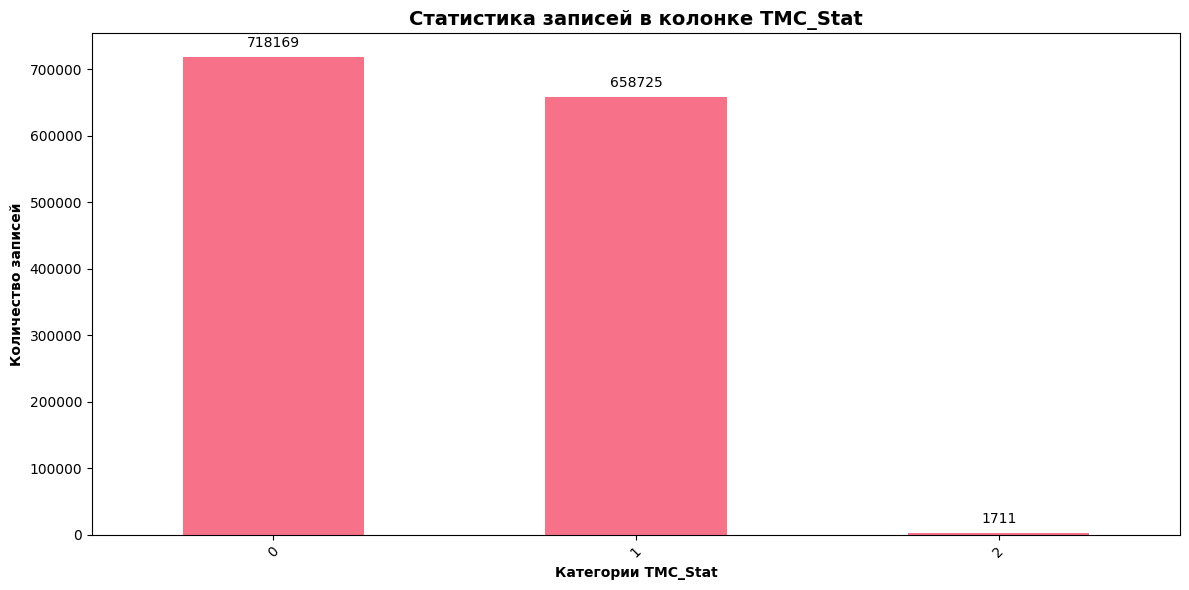

In [33]:
# 1. СТАТИСТИКА КОЛОНКИ TMC_Stat
print("1. СТАТИСТИКА КОЛОНКИ TMC_Stat")
print("-" * 50)

tmc_stat_counts = df['TMC_Stat'].value_counts()
tmc_stat_percentage = df['TMC_Stat'].value_counts(normalize=True) * 100

print(f"Всего уникальных категорий: {len(tmc_stat_counts)}")
print("\nРаспределение по категориям:")
for category, count in tmc_stat_counts.items():
    percentage = tmc_stat_percentage[category]
    print(f"  {category}: {count} записей ({percentage:.1f}%)")

# Столбчатая диаграмма для TMC_Stat
plt.figure(figsize=(12, 6))
ax = tmc_stat_counts.plot(kind='bar')
plt.title('Статистика записей в колонке TMC_Stat', fontsize=14, fontweight='bold')
plt.xlabel('Категории TMC_Stat', fontweight='bold')
plt.ylabel('Количество записей', fontweight='bold')
plt.xticks(rotation=45)
add_value_labels(ax)
plt.tight_layout()
plt.show()

# Сохраняем статистику для отчета
tmc_stat_df = pd.DataFrame({
    'Категория': tmc_stat_counts.index,
    'Количество': tmc_stat_counts.values,
    'Процент': (tmc_stat_counts.values / len(df) * 100).round(2)
})
dataframes_to_save['tmc_stat_analysis'] = tmc_stat_df
print()


In [34]:
# 2.1. АНАЛИЗ ПОДСТРОКИ "НА БЛОК" В HIERARCHY_MTR_NAME
print("2. АНАЛИЗ ПОДСТРОКИ 'НА БЛОК' В HIERARCHY_MTR_NAME")
print("-" * 50)

if 'Hierarchy_MTR_Name' in df.columns:
    na_blok_mask = df['Hierarchy_MTR_Name'].str.contains('На Блок', na=False)
    na_blok_count = na_blok_mask.sum()
    na_blok_by_category = df[na_blok_mask].groupby('TMC_Stat').size()
    
    print(f"Всего записей с 'На Блок': {na_blok_count} ({na_blok_count/len(df)*100:.1f}% от общего числа)")
    print("\nРаспределение по категориям TMC_Stat:")
    for category, count in na_blok_by_category.items():
        percentage = count/na_blok_count * 100 if na_blok_count > 0 else 0
        print(f"  {category}: {count} записей ({percentage:.1f}%)")
    
    # Сохраняем для отчета
    na_blok_df = pd.DataFrame({
        'TMC_Stat': na_blok_by_category.index,
        'Количество_с_На_блок': na_blok_by_category.values
    })
    dataframes_to_save['na_blok_analysis'] = na_blok_df
else:
    print("Колонка Hierarchy_MTR_Name не найдена в датафрейме")
print()


2. АНАЛИЗ ПОДСТРОКИ 'НА БЛОК' В HIERARCHY_MTR_NAME
--------------------------------------------------
Всего записей с 'На Блок': 47738 (3.5% от общего числа)

Распределение по категориям TMC_Stat:
  0: 38697 записей (81.1%)
  1: 9014 записей (18.9%)
  2: 27 записей (0.1%)



In [35]:
# 2.2. АНАЛИЗ ПОДСТРОКИ "X" В HIERARCHY_MTR_NAME
print("2. АНАЛИЗ ПОДСТРОКИ '[X]' В HIERARCHY_MTR_NAME")
print("-" * 50)

if 'Hierarchy_MTR_Name' in df.columns:
    na_blok_mask = df['Hierarchy_MTR_Name'].str.contains('[X]', na=False)
    na_blok_count = na_blok_mask.sum()
    na_blok_by_category = df[na_blok_mask].groupby('TMC_Stat').size()
    
    print(f"Всего записей с '[X]': {na_blok_count} ({na_blok_count/len(df)*100:.1f}% от общего числа)")
    print("\nРаспределение по категориям TMC_Stat:")
    for category, count in na_blok_by_category.items():
        percentage = count/na_blok_count * 100 if na_blok_count > 0 else 0
        print(f"  {category}: {count} записей ({percentage:.1f}%)")
    
    # Сохраняем для отчета
    na_blok_df = pd.DataFrame({
        'TMC_Stat': na_blok_by_category.index,
        'Количество_с_На_блок': na_blok_by_category.values
    })
    dataframes_to_save['[X]_analysis'] = na_blok_df
else:
    print("Колонка Hierarchy_MTR_Name не найдена в датафрейме")
print()

2. АНАЛИЗ ПОДСТРОКИ '[X]' В HIERARCHY_MTR_NAME
--------------------------------------------------
Всего записей с '[X]': 71559 (5.2% от общего числа)

Распределение по категориям TMC_Stat:
  0: 453 записей (0.6%)
  1: 70985 записей (99.2%)
  2: 121 записей (0.2%)



In [36]:
# 3. СОЗДАНИЕ ДАТАФРЕЙМА ETALON
print("3. СОЗДАНИЕ ДАТАФРЕЙМА ETALON")
print("-" * 50)

if 'COMMENT' in df.columns:
    etalon_mask = (df['COMMENT'].str.contains('Эталонная запись', na=False) | 
                   df['COMMENT'].str.contains('Эталонные записи', na=False))
    etalon = df[etalon_mask].copy()
    
    print(f"Найдено эталонных записей: {len(etalon)} ({len(etalon)/len(df)*100:.2f}% от общего числа)")
    
    if len(etalon) > 0:
        print("Распределение эталонных записей по TMC_Stat:")
        etalon_tmc_stat = etalon['TMC_Stat'].value_counts()
        for category, count in etalon_tmc_stat.items():
            percentage = count/len(etalon) * 100
            print(f"  {category}: {count} записей ({percentage:.1f}%)")
        
        # Сохраняем эталонные записи
        dataframes_to_save['etalon'] = etalon
    else:
        print("Эталонные записи не найдены")
        etalon = pd.DataFrame()
else:
    print("Колонка COMMENT не найдена в датафрейме")
    etalon = pd.DataFrame()
print()


3. СОЗДАНИЕ ДАТАФРЕЙМА ETALON
--------------------------------------------------
Найдено эталонных записей: 106537 (7.73% от общего числа)
Распределение эталонных записей по TMC_Stat:
  0: 106212 записей (99.7%)
  1: 322 записей (0.3%)
  2: 3 записей (0.0%)



4. АНАЛИЗ ЭТАЛОННЫХ ЗАПИСЕЙ
--------------------------------------------------
Эталонных записей: 106537 (7.73% от общего числа)


<Figure size 1400x800 with 0 Axes>

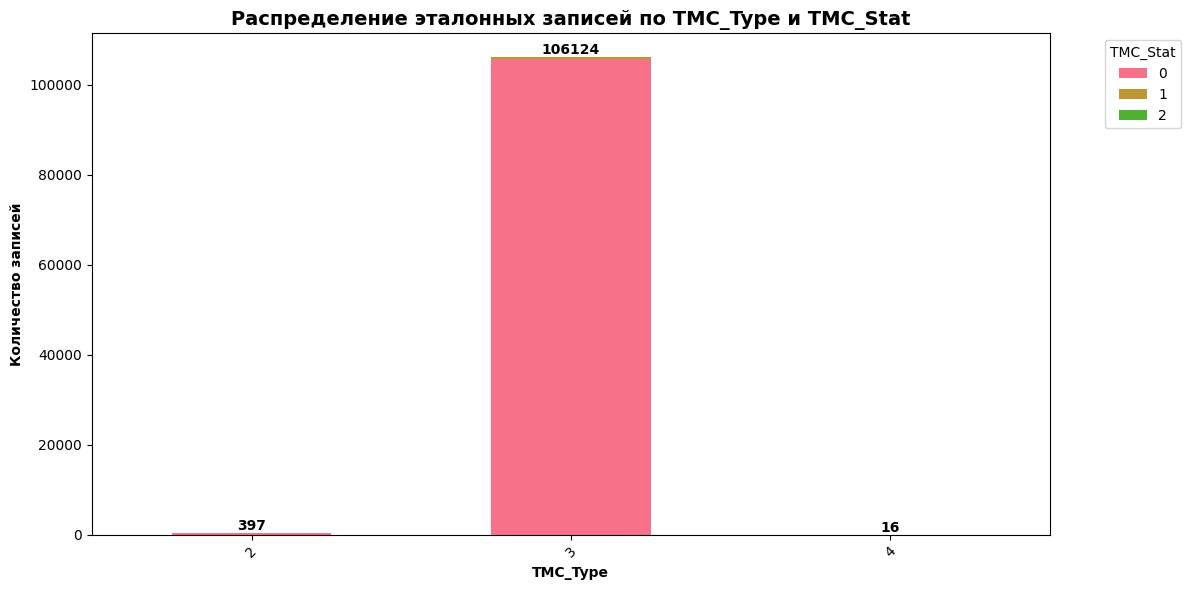


Топ-10 комбинаций TMC_Type + TMC_Stat:
  3 + 0: 105802 записей
  2 + 0: 395 записей
  3 + 1: 319 записей
  4 + 0: 15 записей
  3 + 2: 3 записей
  2 + 1: 2 записей
  4 + 1: 1 записей



In [37]:
# 4.1. АНАЛИЗ ЭТАЛОННЫХ ЗАПИСЕЙ
print("4. АНАЛИЗ ЭТАЛОННЫХ ЗАПИСЕЙ")
print("-" * 50)

if len(etalon) > 0:
    #non_etalon = df[~df.index.isin(etalon.index)]
    print(f"Эталонных записей: {len(etalon)} ({len(etalon)/len(df)*100:.2f}% от общего числа)")
    
    # Статистика по TMC_Type и TMC_Stat
    type_stat_counts = etalon.groupby(['TMC_Type', 'TMC_Stat']).size().unstack(fill_value=0)
    
    # График для неэталонных записей
    plt.figure(figsize=(14, 8))
    ax = type_stat_counts.plot(kind='bar', stacked=True)
    plt.title('Распределение эталонных записей по TMC_Type и TMC_Stat', fontsize=14, fontweight='bold')
    plt.xlabel('TMC_Type', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(title='TMC_Stat', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Добавляем числовые значения (для общего количества по TMC_Type)
    for i, (idx, row) in enumerate(type_stat_counts.iterrows()):
        total = row.sum()
        if total > 0:
            plt.text(i, total + 5, f'{int(total)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nТоп-10 комбинаций TMC_Type + TMC_Stat:")
    combined_stats = etalon.groupby(['TMC_Type', 'TMC_Stat']).size().sort_values(ascending=False).head(10)
    for (tmc_type, tmc_stat), count in combined_stats.items():
        print(f"  {tmc_type} + {tmc_stat}: {count} записей")
    
    # Сохраняем неэталонные записи
    #dataframes_to_save['non_etalon_records'] = non_etalon
else:
    
    print("Эталонные записи не найдены")
print()

4.2. АНАЛИЗ НЕЭТАЛОННЫХ ЗАПИСЕЙ
--------------------------------------------------
Неэталонных записей: 1272068 (92.27% от общего числа)


<Figure size 1400x800 with 0 Axes>

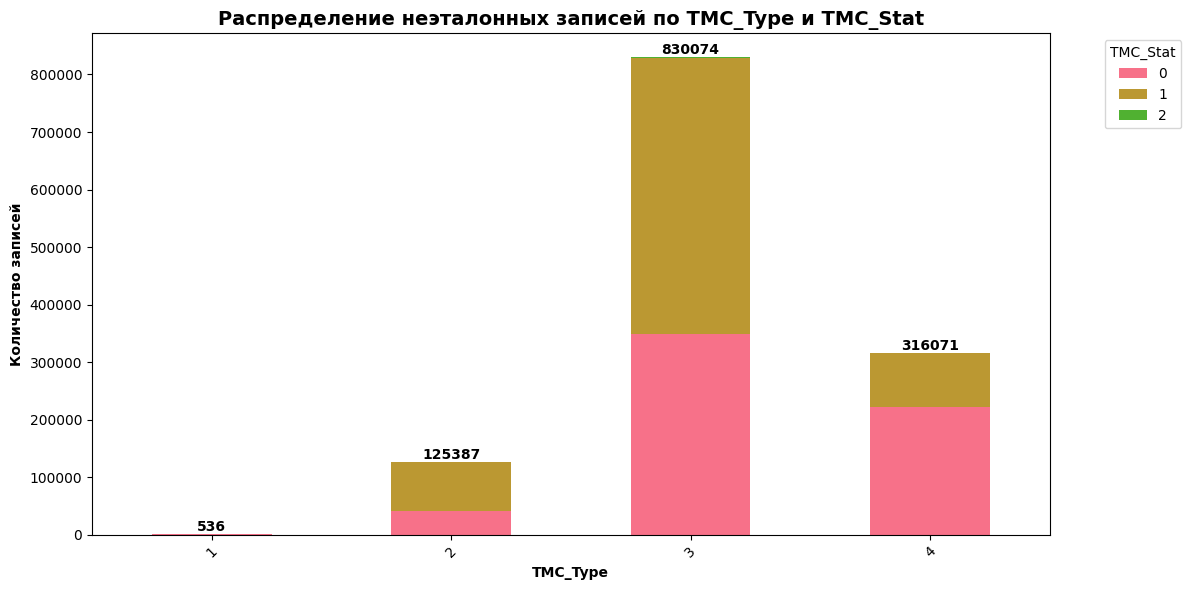


Топ-10 комбинаций TMC_Type + TMC_Stat:
  3 + 1: 479190 записей
  3 + 0: 349567 записей
  4 + 0: 221872 записей
  4 + 1: 93919 записей
  2 + 1: 85202 записей
  2 + 0: 40106 записей
  3 + 2: 1317 записей
  1 + 0: 412 записей
  4 + 2: 280 записей
  1 + 1: 92 записей



In [38]:
# 4.2. АНАЛИЗ НЕЭТАЛОННЫХ ЗАПИСЕЙ
print("4.2. АНАЛИЗ НЕЭТАЛОННЫХ ЗАПИСЕЙ")
print("-" * 50)

if len(etalon) > 0:
    non_etalon = df[~df.index.isin(etalon.index)]
    print(f"Неэталонных записей: {len(non_etalon)} ({len(non_etalon)/len(df)*100:.2f}% от общего числа)")
    
    # Статистика по TMC_Type и TMC_Stat
    type_stat_counts = non_etalon.groupby(['TMC_Type', 'TMC_Stat']).size().unstack(fill_value=0)
    
    # График для неэталонных записей
    plt.figure(figsize=(14, 8))
    ax = type_stat_counts.plot(kind='bar', stacked=True)
    plt.title('Распределение неэталонных записей по TMC_Type и TMC_Stat', fontsize=14, fontweight='bold')
    plt.xlabel('TMC_Type', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(title='TMC_Stat', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Добавляем числовые значения (для общего количества по TMC_Type)
    for i, (idx, row) in enumerate(type_stat_counts.iterrows()):
        total = row.sum()
        if total > 0:
            plt.text(i, total + 5, f'{int(total)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nТоп-10 комбинаций TMC_Type + TMC_Stat:")
    combined_stats = non_etalon.groupby(['TMC_Type', 'TMC_Stat']).size().sort_values(ascending=False).head(10)
    for (tmc_type, tmc_stat), count in combined_stats.items():
        print(f"  {tmc_type} + {tmc_stat}: {count} записей")
    
    # Сохраняем неэталонные записи
    #dataframes_to_save['non_etalon_records'] = non_etalon
else:
    non_etalon = df
    print("Эталонные записи не найдены, анализируем весь датафрейм")
print()


In [19]:
# 5. АНАЛИЗ ОШИБОК СБОРКИ В ЭТАЛОННЫХ ЗАПИСЯХ
print("5. АНАЛИЗ ОШИБОК СБОРКИ В ЭТАЛОННЫХ ЗАПИСЯХ")
print("-" * 50)

if len(etalon) > 0:
    required_cols = ['SHORT_NAME/ru_RU', 'AUTO_SHORT_NAME', 'FULL_NAME/ru_RU', 'AUTO_FULL_NAME']
    missing_cols = [col for col in required_cols if col not in etalon.columns]
    
    if not missing_cols:
        short_name_mismatch = etalon['SHORT_NAME/ru_RU'] != etalon['AUTO_SHORT_NAME']
        full_name_mismatch = etalon['FULL_NAME/ru_RU'] != etalon['AUTO_FULL_NAME']
        
        oshibka_sborki = etalon[short_name_mismatch | full_name_mismatch].copy()
        
        print(f"Найдено записей с ошибками сборки: {len(oshibka_sborki)} ({len(oshibka_sborki)/len(etalon)*100:.1f}% от эталонных)")
        print(f"Несовпадение SHORT_NAME: {short_name_mismatch.sum()} записей")
        print(f"Несовпадение FULL_NAME: {full_name_mismatch.sum()} записей")
        
        # Статистика ошибок для графика
        error_data = {
            'SHORT_NAME': short_name_mismatch.sum(),
            'FULL_NAME': full_name_mismatch.sum(),
            'Общие ошибки': len(oshibka_sborki)
        }
        
        plt.figure(figsize=(10, 6))
        ax = pd.Series(error_data).plot(kind='bar')
        plt.title('Статистика ошибок сборки в эталонных записях', fontsize=14, fontweight='bold')
        plt.ylabel('Количество записей', fontweight='bold')
        plt.xticks(rotation=45)
        
        add_value_labels(ax)
        plt.tight_layout()
        plt.show()
        
        if len(oshibka_sborki) > 0:
            print("\nРаспределение ошибок по TMC_Stat:")
            error_by_stat = oshibka_sborki['TMC_Stat'].value_counts()
            for category, count in error_by_stat.items():
                print(f"  {category}: {count} записей")
            
            # Сохраняем ошибки сборки
            dataframes_to_save['oshibka_sborki'] = oshibka_sborki
    else:
        print(f"Отсутствуют необходимые колонки: {missing_cols}")
        oshibka_sborki = pd.DataFrame()
else:
    oshibka_sborki = pd.DataFrame()
    print("Нет эталонных записей для анализа ошибок сборки")
print()


5. АНАЛИЗ ОШИБОК СБОРКИ В ЭТАЛОННЫХ ЗАПИСЯХ
--------------------------------------------------
Нет эталонных записей для анализа ошибок сборки



6. АНАЛИЗ TRU_SAP_ID
--------------------------------------------------
Статистика количества значений в TRU_SAP_ID:
  0 значений: 156359 записей (11.3%)
  1 значений: 1093239 записей (79.3%)
  2 значений: 102271 записей (7.4%)
  3 значений: 8170 записей (0.6%)
  4 значений: 8404 записей (0.6%)
  5 значений: 9395 записей (0.7%)
  6 значений: 61 записей (0.0%)
  7 значений: 691 записей (0.1%)
  14 значений: 15 записей (0.0%)


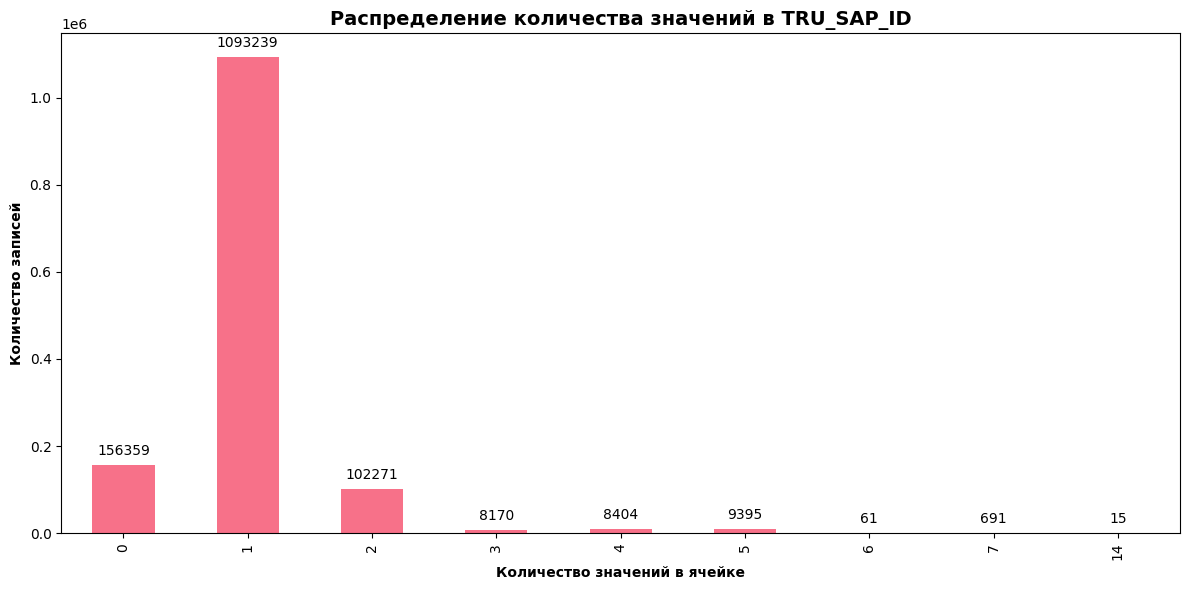

Среднее количество значений: 1.02
Максимальное количество значений: 14



In [39]:
# 6. АНАЛИЗ TRU_SAP_ID
print("6. АНАЛИЗ TRU_SAP_ID")
print("-" * 50)

if 'TRU_SAP_ID' in df.columns:
    def count_values(cell):
        if pd.isna(cell) or cell == '':
            return 0
        return len(str(cell).split('|'))
    
    df['TRU_SAP_ID_count'] = df['TRU_SAP_ID'].apply(count_values)
    tru_sap_stats = df['TRU_SAP_ID_count'].value_counts().sort_index()
    
    print("Статистика количества значений в TRU_SAP_ID:")
    total_cells = len(df)
    for count_val, freq in tru_sap_stats.items():
        percentage = freq / total_cells * 100
        print(f"  {count_val} значений: {freq} записей ({percentage:.1f}%)")
    
    # График распределения
    plt.figure(figsize=(12, 6))
    ax = tru_sap_stats.plot(kind='bar')
    plt.title('Распределение количества значений в TRU_SAP_ID', fontsize=14, fontweight='bold')
    plt.xlabel('Количество значений в ячейке', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()
    
    # Дополнительная статистика
    avg_values = df['TRU_SAP_ID_count'].mean()
    max_values = df['TRU_SAP_ID_count'].max()
    print(f"Среднее количество значений: {avg_values:.2f}")
    print(f"Максимальное количество значений: {max_values}")
    
    # Сохраняем анализ
    tru_sap_df = pd.DataFrame({
        'Количество_значений': tru_sap_stats.index,
        'Количество_записей': tru_sap_stats.values,
        'Процент': (tru_sap_stats.values / len(df) * 100).round(2)
    })
    dataframes_to_save['tru_sap_analysis'] = tru_sap_df
else:
    print("Колонка TRU_SAP_ID не найдена в датафрейме")
print()


7. АНАЛИЗ TRU_EXCEPTION_SAP_ID
--------------------------------------------------
Статистика количества значений в TRU_EXCEPTION_SAP_ID:
  0 значений: 791496 записей (57.4%)
  1 значений: 416745 записей (30.2%)
  2 значений: 96384 записей (7.0%)
  3 значений: 47999 записей (3.5%)
  4 значений: 16722 записей (1.2%)
  5 значений: 4995 записей (0.4%)
  6 значений: 4221 записей (0.3%)
  7 значений: 40 записей (0.0%)
  8 значений: 2 записей (0.0%)
  10 значений: 1 записей (0.0%)
Проблемных записей в TRU_EXCEPTION: 331326 (24.03%)


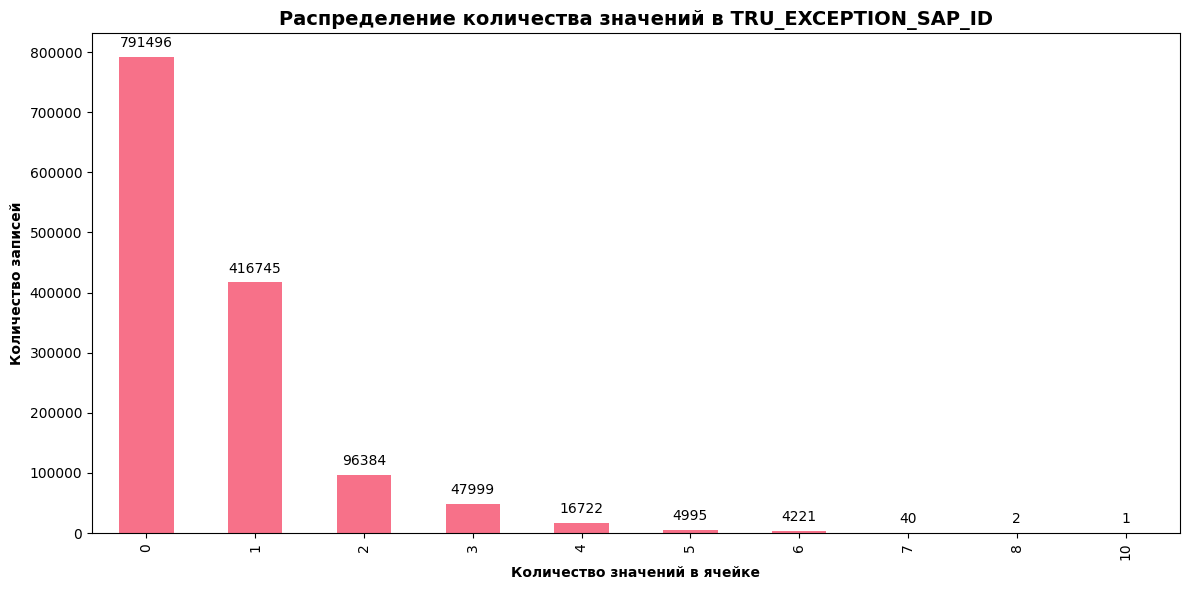

In [40]:
# 7. АНАЛИЗ TRU_EXCEPTION_SAP_ID
print("7. АНАЛИЗ TRU_EXCEPTION_SAP_ID")
print("-" * 50)

if 'TRU_EXCEPTION_SAP_ID' in df.columns:
    df['TRU_EXCEPTION_count'] = df['TRU_EXCEPTION_SAP_ID'].apply(count_values)
    tru_exception_stats = df['TRU_EXCEPTION_count'].value_counts().sort_index()
    
    print("Статистика количества значений в TRU_EXCEPTION_SAP_ID:")
    for count_val, freq in tru_exception_stats.items():
        percentage = freq / total_cells * 100
        print(f"  {count_val} значений: {freq} записей ({percentage:.1f}%)")
    
    # Создание датафрейма bad_tru_exception
    bad_tru_exception = df[df['TRU_EXCEPTION_count'] > 1].copy()
    
    # Проверка для записей с одним значением
    if 'TRU_SAP_ID' in df.columns:
        single_value_mask = df['TRU_EXCEPTION_count'] == 1
        single_value_records = df[single_value_mask]
        
        # Получение всех значений TRU_SAP_ID
        all_tru_sap_ids = set()
        for value in df['TRU_SAP_ID'].dropna():
            all_tru_sap_ids.update(str(value).split('|'))
        
        # Проверка наличия значений TRU_EXCEPTION_SAP_ID в TRU_SAP_ID
        missing_records = []
        for idx, row in single_value_records.iterrows():
            exception_value = str(row['TRU_EXCEPTION_SAP_ID']).strip()
            if exception_value and exception_value not in all_tru_sap_ids:
                missing_records.append(idx)
        
        # Добавление записей с отсутствующими значениями
        additional_bad_records = df.loc[missing_records]
        bad_tru_exception = pd.concat([bad_tru_exception, additional_bad_records]).drop_duplicates()
    
    print(f"Проблемных записей в TRU_EXCEPTION: {len(bad_tru_exception)} ({len(bad_tru_exception)/len(df)*100:.2f}%)")
    
    # График распределения
    plt.figure(figsize=(12, 6))
    ax = tru_exception_stats.plot(kind='bar')
    plt.title('Распределение количества значений в TRU_EXCEPTION_SAP_ID', fontsize=14, fontweight='bold')
    plt.xlabel('Количество значений в ячейке', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()
    
    # Сохраняем проблемные записи
    if len(bad_tru_exception) > 0:
        dataframes_to_save['bad_tru_exception'] = bad_tru_exception
    
    # Сохраняем анализ
    tru_exception_df = pd.DataFrame({
        'Количество_значений': tru_exception_stats.index,
        'Количество_записей': tru_exception_stats.values,
        'Процент': (tru_exception_stats.values / len(df) * 100).round(2)
    })
    dataframes_to_save['tru_exception_analysis'] = tru_exception_df
    
else:
    print("Колонка TRU_EXCEPTION_SAP_ID не найдена в датафрейме")
    bad_tru_exception = pd.DataFrame()
print()


In [23]:
# 8. АЛЬТЕРНАТИВНОЕ СРАВНЕНИЕ ДАТАФРЕЙМОВ (FLOAT МЕТОД)
print("8. АЛЬТЕРНАТИВНОЕ СРАВНЕНИЕ ДАТАФРЕЙМОВ (FLOAT МЕТОД)")
print("-" * 60)

# Предполагаем, что df_classes уже загружен
if 'df_classes' in globals():
    df_classes_clean = df_classes.rename(columns={'HIERARCHY_MTR/CSCD_ID': 'HIERARCHY_MTR_CSCD_ID'})
    df_noX = df
    df_noX['Hierarchy_MTR_Name'] = df['Hierarchy_MTR_Name'].astype(str).str.replace(r'\[.*?\]', '', regex=True).str.strip()
    required_cols_main = ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name']
    required_cols_classes = ['HIERARCHY_MTR_CSCD_ID', 'NAME']
    
    if all(col in df_noX.columns for col in required_cols_main) and all(col in df_classes_clean.columns for col in required_cols_classes):
        
        df_main_clean = df_noX[required_cols_main].copy()
        df_classes_clean = df_classes_clean[required_cols_classes].copy()
        
        # Функция для приведения к float с обработкой ошибок
        def to_float_safe(value):
            if pd.isna(value):
                return value
            try:
                return float(value)
            except (ValueError, TypeError):
                return value
        
        # Приводим оба столбца к float
        df_main_clean['Hierarchy_MTR_Class_float'] = df_main_clean['Hierarchy_MTR_Class'].apply(to_float_safe)
        df_classes_clean['HIERARCHY_MTR_CSCD_ID_float'] = df_classes_clean['HIERARCHY_MTR_CSCD_ID'].apply(to_float_safe)
        
        # Объединяем по float значениям
        comparison_float = df_main_clean.merge(
            df_classes_clean, 
            left_on='Hierarchy_MTR_Class_float', 
            right_on='HIERARCHY_MTR_CSCD_ID_float', 
            how='inner'
        )
        comparison_float = comparison_float.drop_duplicates()
        print(f"Объединенных записей по float: {len(comparison_float)}")
        
        if len(comparison_float) > 0:
            # Сравниваем имена
            mismatch_float = comparison_float['Hierarchy_MTR_Name'] != comparison_float['NAME']
            #mismatch_float = mismatch_float.drop_duplicates()
            mismatch_count = mismatch_float.sum()
            
            print(f"Несовпадений имен: {mismatch_count}")
            
            if mismatch_count > 0:
                hierarchy_mismatch_float = comparison_float[mismatch_float][[
                    'Hierarchy_MTR_Class', 'Hierarchy_MTR_Class_float',
                    'HIERARCHY_MTR_CSCD_ID', 'HIERARCHY_MTR_CSCD_ID_float',
                    'Hierarchy_MTR_Name', 'NAME'
                ]].rename(columns={
                    'Hierarchy_MTR_Name': 'Hierarchy_MTR_Name_Actual',
                    'NAME': 'Hierarchy_MTR_Name_Expected',
                    'Hierarchy_MTR_Class': 'Hierarchy_MTR_Class_Original_Main',
                    'HIERARCHY_MTR_CSCD_ID': 'Hierarchy_MTR_Class_Original_Class'
                })
                
                hierarchy_mismatch_float['Mismatch_Type'] = 'Name Mismatch (Float Comparison)'
                dataframes_to_save['hierarchy_mismatch'] = hierarchy_mismatch_float
                print("Несовпадения по расхождениям наименований шаблона и класса сохранены!")
                

                
            else:
                print("Все имена совпадают!")
        else:
            print("Нет общих классов для сравнения!")
    else:
        print("Не все необходимые колонки найдены")
else:
    print("Датафрейм df_classes не найден")
print()


8. АЛЬТЕРНАТИВНОЕ СРАВНЕНИЕ ДАТАФРЕЙМОВ (FLOAT МЕТОД)
------------------------------------------------------------
Датафрейм df_classes не найден



In [23]:
# 9. СОЗДАНИЕ EXCEL-ОТЧЕТА (ИСПРАВЛЕННАЯ ВЕРСИЯ)
print("9. СОЗДАНИЕ EXCEL-ОТЧЕТА")
print("-" * 50)

try:
    import openpyxl
    from openpyxl import Workbook
    from openpyxl.drawing.image import Image
    from openpyxl.styles import Font, PatternFill, Alignment
    from openpyxl.utils.dataframe import dataframe_to_rows
    import io
    import os
    
    # Создаем новую книгу Excel
    wb = Workbook()
    wb.remove(wb.active)
    
    def create_sheet_with_data(wb, sheet_name, dataframe, title=None):
        """Создает лист с данными из датафрейма"""
        ws = wb.create_sheet(sheet_name)
        
        if title:
            ws['A1'] = title
            ws['A1'].font = Font(size=14, bold=True)
        
        if not dataframe.empty:
            for r_idx, row in enumerate(dataframe_to_rows(dataframe, index=False, header=True), 3 if title else 1):
                for c_idx, value in enumerate(row, 1):
                    ws.cell(row=r_idx, column=c_idx, value=value)
            
            header_row = 3 if title else 1
            for cell in ws[header_row]:
                cell.font = Font(bold=True)
                cell.fill = PatternFill(start_color="DDDDDD", end_color="DDDDDD", fill_type="solid")
        
        return ws
    
    def save_plot_to_bytesio(fig):
        """Сохраняет график в BytesIO объект вместо временного файла"""
        buffer = io.BytesIO()
        fig.savefig(buffer, format='png', dpi=150, bbox_inches='tight')
        buffer.seek(0)
        plt.close(fig)
        return buffer
    
    # СВОДНЫЙ ЛИСТ
    print("Создание сводного листа...")
    ws_summary = wb.create_sheet("Сводная_информация")
    ws_summary['A1'] = "АНАЛИТИЧЕСКИЙ ОТЧЕТ"
    ws_summary['A1'].font = Font(size=16, bold=True)
    ws_summary['A2'] = f"Дата создания: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}"
    ws_summary['A4'] = "СВОДНАЯ СТАТИСТИКА"
    ws_summary['A4'].font = Font(size=14, bold=True)
    
    summary_data = [
        ("Всего записей", f"{len(df):,}"),
        ("Уникальных TMC_Stat", f"{df['TMC_Stat'].nunique()}"),
        ("Эталонных записей", f"{len(etalon) if 'etalon' in locals() and len(etalon) > 0 else 0:,}"),
        ("Ошибок сборки", f"{len(oshibka_sborki) if 'oshibka_sborki' in locals() and len(oshibka_sborki) > 0 else 0:,}"),
        ("Проблемных TRU_EXCEPTION", f"{len(bad_tru_exception) if 'bad_tru_exception' in locals() and len(bad_tru_exception) > 0 else 0:,}"),
    ]
    
    if 'hierarchy_mismatch' in dataframes_to_save:
        summary_data.append(("Несовпадений имен классов", f"{len(dataframes_to_save['hierarchy_mismatch']):,}"))
    
    for i, (item, value) in enumerate(summary_data, 5):
        ws_summary[f'A{i}'] = item
        ws_summary[f'B{i}'] = value
        ws_summary[f'A{i}'].font = Font(bold=True)
    
    # ЛИСТ TMC_STAT
    if 'tmc_stat_analysis' in dataframes_to_save:
        print("Создание листа TMC_Stat...")
        ws_tmc = create_sheet_with_data(wb, "TMC_Stat_статистика", dataframes_to_save['tmc_stat_analysis'], "Статистика по TMC_Stat")
        
        # График TMC_Stat
        fig, ax = plt.subplots(figsize=(10, 6))
        tmc_stat_counts = df['TMC_Stat'].value_counts()
        bars = ax.bar(range(len(tmc_stat_counts)), tmc_stat_counts.values)
        ax.set_title('Статистика записей в колонке TMC_Stat')
        ax.set_xlabel('Категории TMC_Stat')
        ax.set_ylabel('Количество записей')
        ax.set_xticks(range(len(tmc_stat_counts)))
        ax.set_xticklabels(tmc_stat_counts.index, rotation=45)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}', ha='center', va='bottom')
        
        # Сохраняем в BytesIO вместо временного файла
        buffer = save_plot_to_bytesio(fig)
        img = Image(buffer)
        img.width = 600
        img.height = 400
        ws_tmc.add_image(img, 'E2')
        print("✓ График TMC_Stat добавлен")
    
    # ЛИСТ ЭТАЛОННЫХ ЗАПИСЕЙ
    if 'etalon' in dataframes_to_save and len(dataframes_to_save['etalon']) > 0:
        print("Создание листа эталонных записей...")
        ws_etalon = create_sheet_with_data(wb, "Эталонные_записи", dataframes_to_save['etalon'], "Эталонные записи")
        print("✓ Лист эталонных записей создан")
    
    # ЛИСТ ОШИБОК СБОРКИ
    if 'oshibka_sborki' in dataframes_to_save and len(dataframes_to_save['oshibka_sborki']) > 0:
        print("Создание листа ошибок сборки...")
        ws_errors = create_sheet_with_data(wb, "Ошибки_сборки", dataframes_to_save['oshibka_sborki'], "Ошибки сборки")
        
        # График ошибок
        fig, ax = plt.subplots(figsize=(8, 5))
        error_data = {
            'SHORT_NAME': short_name_mismatch.sum() if 'short_name_mismatch' in locals() else 0,
            'FULL_NAME': full_name_mismatch.sum() if 'full_name_mismatch' in locals() else 0,
            'Общие ошибки': len(oshibka_sborki)
        }
        bars = ax.bar(error_data.keys(), error_data.values())
        ax.set_title('Статистика ошибок сборки')
        ax.set_ylabel('Количество записей')
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height)}', ha='center', va='bottom')
        
        # Сохраняем в BytesIO
        buffer = save_plot_to_bytesio(fig)
        img_error = Image(buffer)
        img_error.width = 500
        img_error.height = 300
        ws_errors.add_image(img_error, 'H2')
        print("✓ График ошибок сборки добавлен")
    
    # ЛИСТ TRU_SAP_ID
    if 'tru_sap_analysis' in dataframes_to_save:
        print("Создание листа TRU_SAP_ID...")
        ws_tru_sap = create_sheet_with_data(wb, "TRU_SAP_ID_анализ", dataframes_to_save['tru_sap_analysis'], "Анализ TRU_SAP_ID")
        
        # График TRU_SAP_ID
        fig, ax = plt.subplots(figsize=(10, 6))
        tru_sap_stats = df['TRU_SAP_ID_count'].value_counts().sort_index()
        bars = ax.bar(tru_sap_stats.index, tru_sap_stats.values)
        ax.set_title('Распределение количества значений в TRU_SAP_ID')
        ax.set_xlabel('Количество значений в ячейке')
        ax.set_ylabel('Количество записей')
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}', ha='center', va='bottom')
        
        # Сохраняем в BytesIO
        buffer = save_plot_to_bytesio(fig)
        img_tru = Image(buffer)
        img_tru.width = 600
        img_tru.height = 400
        ws_tru_sap.add_image(img_tru, 'E2')
        print("✓ График TRU_SAP_ID добавлен")
    
    # ЛИСТ TRU_EXCEPTION
    if 'tru_exception_analysis' in dataframes_to_save:
        print("Создание листа TRU_EXCEPTION...")
        ws_tru_exception = create_sheet_with_data(wb, "TRU_EXCEPTION_анализ", dataframes_to_save['tru_exception_analysis'], "Анализ TRU_EXCEPTION_SAP_ID")
        
        # График TRU_EXCEPTION
        fig, ax = plt.subplots(figsize=(10, 6))
        tru_exception_stats = df['TRU_EXCEPTION_count'].value_counts().sort_index()
        bars = ax.bar(tru_exception_stats.index, tru_exception_stats.values)
        ax.set_title('Распределение количества значений в TRU_EXCEPTION_SAP_ID')
        ax.set_xlabel('Количество значений в ячейке')
        ax.set_ylabel('Количество записей')
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}', ha='center', va='bottom')
        
        # Сохраняем в BytesIO
        buffer = save_plot_to_bytesio(fig)
        img_tru_exception = Image(buffer)
        img_tru_exception.width = 600
        img_tru_exception.height = 400
        ws_tru_exception.add_image(img_tru_exception, 'E2')
        print("✓ График TRU_EXCEPTION добавлен")
    
    # ЛИСТ НЕСОВПАДЕНИЙ
    if 'hierarchy_mismatch' in dataframes_to_save and len(dataframes_to_save['hierarchy_mismatch']) > 0:
        print("Создание листа несовпадений...")
        ws_mismatch = create_sheet_with_data(wb, "Несовпадения_имен", dataframes_to_save['hierarchy_mismatch'], "Несовпадения имен классов")
        
        # График несовпадений
        fig, ax = plt.subplots(figsize=(12, 6))
        mismatch_df = dataframes_to_save['hierarchy_mismatch']
        top_mismatches = mismatch_df['Hierarchy_MTR_Class_float'].value_counts().head(10)
        bars = ax.bar(range(len(top_mismatches)), top_mismatches.values)
        ax.set_title('Топ-10 классов с несовпадающими именами')
        ax.set_xlabel('ID Класса')
        ax.set_ylabel('Количество несовпадений')
        ax.set_xticks(range(len(top_mismatches)))
        
        # Форматируем подписи осей
        labels = []
        for x in top_mismatches.index:
            if float(x).is_integer():
                labels.append(f"{int(float(x))}")
            else:
                labels.append(f"{x}")
        ax.set_xticklabels(labels, rotation=45)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height)}', ha='center', va='bottom')
        
        # Сохраняем в BytesIO
        buffer = save_plot_to_bytesio(fig)
        img_mismatch = Image(buffer)
        img_mismatch.width = 600
        img_mismatch.height = 400
        ws_mismatch.add_image(img_mismatch, 'H2')
        print("✓ График несовпадений добавлен")
    
    # ЛИСТ "НА БЛОК" АНАЛИЗ
    if 'na_blok_analysis' in dataframes_to_save:
        print("Создание листа анализа 'На блок'...")
        ws_na_blok = create_sheet_with_data(wb, "Анализ_На_блок", dataframes_to_save['na_blok_analysis'], "Анализ записей с 'На блок'")
        print("✓ Лист анализа 'На блок' создан")
    
    # ЛИСТ НЕЭТАЛОННЫХ ЗАПИСЕЙ
    if 'non_etalon_records' in dataframes_to_save and len(dataframes_to_save['non_etalon_records']) > 0:
        print("Создание листа неэталонных записей...")
        # Сохраняем только первые 1000 записей чтобы файл не был слишком большим
        non_etalon_sample = dataframes_to_save['non_etalon_records'].head(1000)
        ws_non_etalon = create_sheet_with_data(wb, "Неэталонные_записи", non_etalon_sample, "Неэталонные записи (первые 1000)")
        print("✓ Лист неэталонных записей создан")
    
    # ЛИСТ BAD_TRU_EXCEPTION
    if 'bad_tru_exception' in dataframes_to_save and len(dataframes_to_save['bad_tru_exception']) > 0:
        print("Создание листа проблемных TRU_EXCEPTION...")
        ws_bad_tru = create_sheet_with_data(wb, "Проблемные_TRU_EXCEPTION", dataframes_to_save['bad_tru_exception'], "Проблемные записи TRU_EXCEPTION")
        print("✓ Лист проблемных TRU_EXCEPTION создан")
    
    # Настраиваем ширину колонок для всех листов
    for sheet in wb.sheetnames:
        ws = wb[sheet]
        for col in range(1, 15):  # Увеличиваем количество колонок
            col_letter = openpyxl.utils.get_column_letter(col)
            try:
                ws.column_dimensions[col_letter].width = 15
            except:
                pass
    
    # Сохраняем файл
    report_path = 'analytical_report.xlsx'
    wb.save(report_path)
    
    print(f"\n✅ Excel-отчет успешно создан: {report_path}")
    print(f"📊 Количество листов в отчете: {len(wb.sheetnames)}")
    print(f"📋 Листы в отчете: {', '.join(wb.sheetnames)}")
    
    # Проверяем размер файла
    file_size = os.path.getsize(report_path)
    print(f"📁 Размер файла: {file_size:,} байт ({file_size/1024/1024:.2f} MB)")
    
except ImportError as e:
    print(f"❌ Необходимые библиотеки не установлены: {e}")
    print("Установите: pip install openpyxl")
except Exception as e:
    print(f"❌ Ошибка при создании Excel-отчета: {e}")
    import traceback
    print(f"Детали ошибки: {traceback.format_exc()}")

print()



9. СОЗДАНИЕ EXCEL-ОТЧЕТА
--------------------------------------------------
Создание сводного листа...
Создание листа TMC_Stat...
✓ График TMC_Stat добавлен
Создание листа эталонных записей...
✓ Лист эталонных записей создан
Создание листа ошибок сборки...
✓ График ошибок сборки добавлен
Создание листа TRU_SAP_ID...
✓ График TRU_SAP_ID добавлен
Создание листа TRU_EXCEPTION...
✓ График TRU_EXCEPTION добавлен
Создание листа несовпадений...
✓ График несовпадений добавлен
Создание листа анализа 'На блок'...
✓ Лист анализа 'На блок' создан
Создание листа проблемных TRU_EXCEPTION...
✓ Лист проблемных TRU_EXCEPTION создан

✅ Excel-отчет успешно создан: analytical_report.xlsx
📊 Количество листов в отчете: 9
📋 Листы в отчете: Сводная_информация, TMC_Stat_статистика, Эталонные_записи, Ошибки_сборки, TRU_SAP_ID_анализ, TRU_EXCEPTION_анализ, Несовпадения_имен, Анализ_На_блок, Проблемные_TRU_EXCEPTION
📁 Размер файла: 74,168,236 байт (70.73 MB)



In [41]:
# 10. СОХРАНЕНИЕ ВСЕХ ДАТАФРЕЙМОВ В ОТДЕЛЬНЫЕ ФАЙЛЫ
print("10. СОХРАНЕНИЕ ВСЕХ ДАТАФРЕЙМОВ")
print("-" * 50)

print("Датафреймы для сохранения:")
for name, dataframe in dataframes_to_save.items():
    if isinstance(dataframe, pd.DataFrame) and len(dataframe) > 0:
        filename = f"{name}.xlsx"
        dataframe.to_excel(filename, index=False)
        print(f"✓ Сохранен: {filename} ({len(dataframe):,} записей)")

print("\n" + "=" * 80)
print("АНАЛИЗ ПОЛНОСТЬЮ ЗАВЕРШЕН!")
print("=" * 80)

# ФИНАЛЬНАЯ СВОДКА
print("\nФИНАЛЬНАЯ СВОДКА:")
print(f"📊 Всего записей: {len(df):,}")
if len(etalon) > 0:
    print(f"🎯 Эталонные записи: {len(etalon):,} ({len(etalon)/len(df)*100:.2f}%)")
if len(oshibka_sborki) > 0:
    print(f"❌ Ошибки сборки: {len(oshibka_sborki):,} ({len(oshibka_sborki)/len(etalon)*100:.2f}% от эталонных)")
if len(bad_tru_exception) > 0:
    print(f"⚠️  Проблемные TRU_EXCEPTION: {len(bad_tru_exception):,} ({len(bad_tru_exception)/len(df)*100:.2f}%)")
if 'hierarchy_mismatch' in dataframes_to_save:
    print(f"🔍 Несовпадения имен: {len(dataframes_to_save['hierarchy_mismatch']):,}")

print(f"\n📁 Сохранено файлов: {len([df for df in dataframes_to_save.values() if isinstance(df, pd.DataFrame) and len(df) > 0])}")
print("📄 Excel-отчет: analytical_report.xlsx")


10. СОХРАНЕНИЕ ВСЕХ ДАТАФРЕЙМОВ
--------------------------------------------------
Датафреймы для сохранения:
✓ Сохранен: tmc_stat_analysis.xlsx (3 записей)
✓ Сохранен: na_blok_analysis.xlsx (3 записей)
✓ Сохранен: [X]_analysis.xlsx (3 записей)
✓ Сохранен: etalon.xlsx (106,537 записей)
✓ Сохранен: tru_sap_analysis.xlsx (9 записей)
✓ Сохранен: bad_tru_exception.xlsx (331,326 записей)
✓ Сохранен: tru_exception_analysis.xlsx (10 записей)

АНАЛИЗ ПОЛНОСТЬЮ ЗАВЕРШЕН!

ФИНАЛЬНАЯ СВОДКА:
📊 Всего записей: 1,378,605
🎯 Эталонные записи: 106,537 (7.73%)


NameError: name 'oshibka_sborki' is not defined

## Сравнение с КХД

In [61]:
khd1 = pd.read_excel('GCMATERIA_GCLASNUM_1.XLSX')

In [62]:
khd2 = pd.read_excel('GCMATERIA_GCLASNUM_2.XLSX')

In [63]:
khd = pd.concat([khd1,khd2],ignore_index=True)

In [64]:
khd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318585 entries, 0 to 1318584
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   /BIC/GCMATERIA  1318585 non-null  int64 
 1   OBJVERS         1318585 non-null  object
 2   /BIC/GCCLASNUM  1318585 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.2+ MB


In [65]:
khd.head()

,/BIC/GCMATERIA,OBJVERS,/BIC/GCCLASNUM
0,1,A,701110700000000
1,2,A,602010000000000
2,3,A,602000000000000
3,6,A,701020000000000
4,7,A,4001082100000000


In [66]:
df_second.head()

,Hierarchy_MTR_Class,Hierarchy_MTR_Name,CSCD_ID,SHORT_NAME/ru_RU,FULL_NAME/ru_RU,TMC_Stat,TMC_Type,COMMENT,AUTO_SHORT_NAME,AUTO_FULL_NAME,source_file
0,7.011105e+14,Канцелярские товары,3703093,Обложка Brauberg картонная арт.530947,"Обложка Brauberg картонная для переплета, арти...",0,4,NaN,NaN,NaN,TMCclean.xlsx
1,7.010909e+14,Мебель и предметы интерьера,2227673,Витрина табачная 2400,Витрина табачная 2400,0,3,стр 57 МК,NaN,NaN,TMCclean.xlsx
2,7.010909e+14,Мебель и предметы интерьера,2227684,Витрина табачная 2600,Витрина табачная 2600,0,3,стр. 57 МК,NaN,NaN,TMCclean.xlsx
3,7.010907e+14,Хозяйственные товары,2331818,"Органайзер д/раковины, диспенсер д/мыла","Органайзер для раковины, диспенсер для мыла",0,4,NaN,NaN,NaN,TMCclean.xlsx
4,6.020111e+14,Масла трансп фирм Премиум неподакц фасов,3648365,Масло L GEAR GL-4 SYNTH 75W85 нк.4л,Масло трансмиссионное LUKOIL GEAR GL-4 SYNTH 7...,0,3,Внесены изменения по заявке от ЛЛК CRQ00000098...,NaN,NaN,TMCclean.xlsx


In [71]:
# Предполагается, что df_second и khd уже загружены

# Приведение столбцов к одному типу, например, к строкам
df_second['Hierarchy_MTR_Class'] = df_second['Hierarchy_MTR_Class'].apply(to_float_safe)
khd['/BIC/GCCLASNUM'] = khd['/BIC/GCCLASNUM'].apply(to_float_safe)





In [80]:
# Объединение по ключу
merged = df_second.merge(
    khd[['/BIC/GCMATERIA', '/BIC/GCCLASNUM']],
    left_on='CSCD_ID',
    right_on='/BIC/GCMATERIA',
    how='left'
)

# Фильтрация по несовпадению в нужных столбцах
mismatch = merged[merged['Hierarchy_MTR_Class'] != merged['/BIC/GCCLASNUM']]

# Добавляем столбец /BIC/GCCLASNUM к результату
result = mismatch[df_second.columns.tolist() + ['/BIC/GCCLASNUM']]


In [73]:
df_second.head()

,Hierarchy_MTR_Class,Hierarchy_MTR_Name,CSCD_ID,SHORT_NAME/ru_RU,FULL_NAME/ru_RU,TMC_Stat,TMC_Type,COMMENT,AUTO_SHORT_NAME,AUTO_FULL_NAME,source_file
0,7.011105e+14,Канцелярские товары,3703093,Обложка Brauberg картонная арт.530947,"Обложка Brauberg картонная для переплета, арти...",0,4,NaN,NaN,NaN,TMCclean.xlsx
1,7.010909e+14,Мебель и предметы интерьера,2227673,Витрина табачная 2400,Витрина табачная 2400,0,3,стр 57 МК,NaN,NaN,TMCclean.xlsx
2,7.010909e+14,Мебель и предметы интерьера,2227684,Витрина табачная 2600,Витрина табачная 2600,0,3,стр. 57 МК,NaN,NaN,TMCclean.xlsx
3,7.010907e+14,Хозяйственные товары,2331818,"Органайзер д/раковины, диспенсер д/мыла","Органайзер для раковины, диспенсер для мыла",0,4,NaN,NaN,NaN,TMCclean.xlsx
4,6.020111e+14,Масла трансп фирм Премиум неподакц фасов,3648365,Масло L GEAR GL-4 SYNTH 75W85 нк.4л,Масло трансмиссионное LUKOIL GEAR GL-4 SYNTH 7...,0,3,Внесены изменения по заявке от ЛЛК CRQ00000098...,NaN,NaN,TMCclean.xlsx


In [81]:
result.head()

,Hierarchy_MTR_Class,Hierarchy_MTR_Name,CSCD_ID,SHORT_NAME/ru_RU,FULL_NAME/ru_RU,TMC_Stat,TMC_Type,COMMENT,AUTO_SHORT_NAME,AUTO_FULL_NAME,source_file,/BIC/GCCLASNUM
43,2.012051e+15,Шпильки стандартные,2109749,Шпилька АМ20-6gх120.35 ГОСТ 9066-75 с/г,Шпилька АМ20-6gх120.35 ГОСТ 9066-75 с/г АМ20-6...,1,3,Переведено в статус На блокирование в рамках п...,Шпилька[Резьба_D ?][Длина_мм ?][Марка материал...,Шпилька[Резьба_D ?][Длина_мм ?][Марка материал...,TMCclean.xlsx,1.606090e+15
53,2.012020e+15,Канаты стальные,1734543,"Канат 17,5-Г-ВК-Н-Т-Р-1860 ГОСТ 3077-80","Канат стальной 17,5-Г-ВК-Н-Р-Т-1860 ГОСТ 3077-80",0,3,Временная разблокировка,Канат[Материал ?][Диаметр_мм ?][Маркировочная ...,Канат[Материал ?][Диаметр_мм ?][Маркировочная ...,TMCclean.xlsx,1.603040e+15
70,2.009043e+15,"Круги, диски отрезные алмазные",3422133,"Круг LugaAbrasiv КЛТ1 125х22,23 P40",Круг лепестковый торцевой LugaAbrasiv КЛТ1 125...,1,3,Переведено в статус На блокирование в рамках п...,[Вид продукции ?][Производитель/бренд ?][Разме...,[Вид продукции ?][Тип ?][Производитель/бренд ?...,TMCclean.xlsx,1.304290e+15
97,2.001021e+15,Части противовыбросового оборудования прочие,2122618,"Вертикальный блок задвижек 5 1/8"", 5К","Вертикальный блок задвижек 130,2 мм (5 1/8"") 5К",0,3,для заявочной кампании /уточните размеры (в до...,NaN,NaN,TMCclean.xlsx,3.301021e+15
144,2.012050e+15,Винты стандартные,2113127,Винт А.М6-6gх35.58.016 ГОСТ 17473-80,Винт А.М6-6gх35.58.016 ГОСТ 17473-80,1,3,Переведено в статус На блокирование в рамках п...,Винт[Резьба ?][Длина_мм ?][Класс прочности ?][...,Винт[Резьба ?][Длина_мм ?][Класс прочности ?][...,TMCclean.xlsx,1.606040e+15


In [82]:
result.to_excel('mismatch_records.xlsx', index=False)

## Классы нижнего уровня

12. АНАЛИЗ ДОПОЛНИТЕЛЬНОГО ДАТАФРЕЙМА
--------------------------------------------------
Загрузка дополнительного датафрейма...
Размер дополнительного датафрейма: (5831, 51)
Колонки в дополнительном датафрейме: ['CSCD_ID', 'PARENT_ID', 'LEVEL', 'NORMALIZED_CLASS', 'SHORT_NAME/ru_RU', 'SHORT_NAME/en_US', 'FULL_NAME/ru_RU', 'FULL_NAME/en_US', 'COMMENT', 'SIP_CODE', 'SIP_NAME', 'MTR_KINDS_ID', 'KIND_NAME', 'MATERIAL_GROUP', 'COST_GROUP', 'COST_GROUP_DISPLAYNAME', 'ACTIVITY_CLASS', 'ACTIVITY_CLASS_DISPLAYNAME', 'HIERARCHY_UBM_MAPPING_ID', 'HIERARCHY_UBM_MAPPING_DISPLAYNAME', 'CLASS_TECH_RULES', 'CLASS_TECH_RULES_DISPLAYNAME', 'TRU_ID', 'TRU_SAP_ID', 'LIST_TRU', 'ETSNG/ETSNG_CODE', 'ETSNG/RECOMMENDATION', 'PERSONAL_PROTECTIVE_EQUIPMENT', 'PERSONAL_PROTECTIVE_EQUIPMENT_DISPLAYNAME', 'TYPE_OF_SUPPLIERS_NAME', 'TMC_KIND', 'TMC_KIND_DISPLAYNAME', 'MINENERGO_GROUP', 'MINENERGO_GROUP_DISPLAYNAME', 'ITEM_TYPE', 'ITEM_TYPE_DISPLAYNAME', 'TAX/TAX_VALUE', 'TAX/TAX_VALUE_NAME', 'TAX/TAX_DATE', 'TN_VED

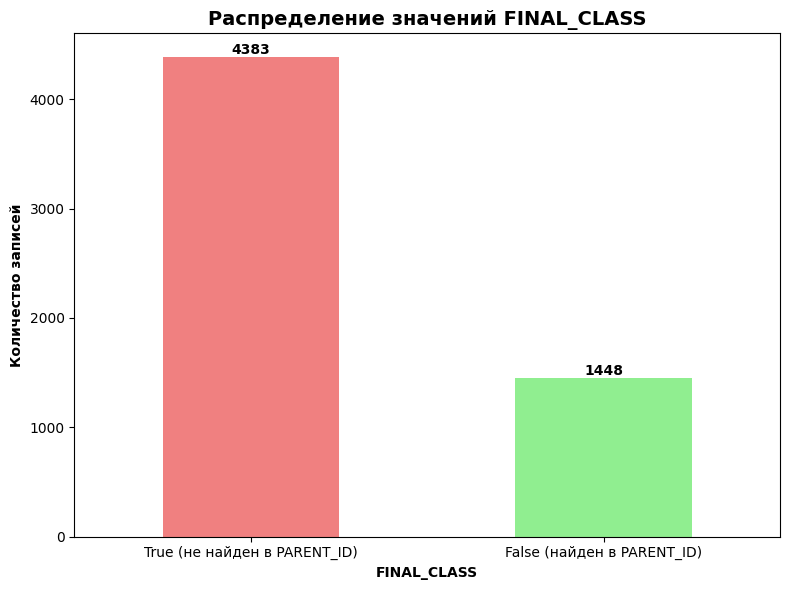


✅ Анализ завершен. FINAL_CLASS добавлена в датафрейм.
📊 Всего записей с FINAL_CLASS = True: 4383



In [17]:
# 12. ЗАГРУЗКА И АНАЛИЗ ДОПОЛНИТЕЛЬНОГО ДАТАФРЕЙМА
print("12. АНАЛИЗ ДОПОЛНИТЕЛЬНОГО ДАТАФРЕЙМА")
print("-" * 50)

try:
    # Загрузка дополнительного датафрейма
    # Укажите путь к вашему файлу
    additional_file_path = "классификатор.xlsx"  # ЗАМЕНИТЕ НА АКТУАЛЬНЫЙ ПУТЬ
    
    print("Загрузка дополнительного датафрейма...")
    df_additional = pd.read_excel(additional_file_path)
    
    print(f"Размер дополнительного датафрейма: {df_additional.shape}")
    print(f"Колонки в дополнительном датафрейме: {list(df_additional.columns)}")
    print("\nПервые 5 строк дополнительного датафрейма:")
    print(df_additional.head())
    print()
    
    # Проверяем наличие необходимых колонок
    if 'CSCD_ID' in df_additional.columns and 'PARENT_ID' in df_additional.columns:
        
        print("АНАЛИЗ КОЛОНОК CSCD_ID И PARENT_ID:")
        print(f"Уникальных значений CSCD_ID: {df_additional['CSCD_ID'].nunique()}")
        print(f"Уникальных значений PARENT_ID: {df_additional['PARENT_ID'].nunique()}")
        print(f"Пустых значений в CSCD_ID: {df_additional['CSCD_ID'].isna().sum()}")
        print(f"Пустых значений в PARENT_ID: {df_additional['PARENT_ID'].isna().sum()}")
        print()
        
        # Преобразуем типы данных для сравнения (на случай разных типов)
        df_additional['CSCD_ID'] = df_additional['CSCD_ID'].astype(str).str.strip()
        df_additional['PARENT_ID'] = df_additional['PARENT_ID'].astype(str).str.strip()
        
        # Создаем множество всех PARENT_ID для быстрого поиска
        all_parent_ids = set(df_additional['PARENT_ID'].dropna().unique())
        
        print(f"Всего уникальных PARENT_ID: {len(all_parent_ids)}")
        print(f"Примеры PARENT_ID: {list(all_parent_ids)[:10]}")
        print()
        
        # Добавляем колонку FINAL_CLASS
        # FINAL_CLASS = True, если CSCD_ID не найден в PARENT_ID
        df_additional['FINAL_CLASS'] = ~df_additional['CSCD_ID'].isin(all_parent_ids)
        
        # Статистика по FINAL_CLASS
        final_class_stats = df_additional['FINAL_CLASS'].value_counts()
        print("СТАТИСТИКА ПО КОЛОНКЕ FINAL_CLASS:")
        print(f"FINAL_CLASS = True: {final_class_stats.get(True, 0)} записей")
        print(f"FINAL_CLASS = False: {final_class_stats.get(False, 0)} записей")
        
        if True in final_class_stats:
            percentage_true = (final_class_stats[True] / len(df_additional)) * 100
            print(f"Процент FINAL_CLASS = True: {percentage_true:.2f}%")
        print()
        
        # Примеры записей с FINAL_CLASS = True и False
        print("ПРИМЕРЫ ЗАПИСЕЙ:")
        print("FINAL_CLASS = True (CSCD_ID не найден в PARENT_ID):")
        true_examples = df_additional[df_additional['FINAL_CLASS'] == True].head(3)
        for idx, row in true_examples.iterrows():
            print(f"  CSCD_ID: {row['CSCD_ID']}, PARENT_ID: {row['PARENT_ID']}")
        
        print("\nFINAL_CLASS = False (CSCD_ID найден в PARENT_ID):")
        false_examples = df_additional[df_additional['FINAL_CLASS'] == False].head(3)
        for idx, row in false_examples.iterrows():
            print(f"  CSCD_ID: {row['CSCD_ID']}, PARENT_ID: {row['PARENT_ID']}")
        
        # Дополнительный анализ: топ самых частых PARENT_ID
        print(f"\nТОП-10 САМЫХ ЧАСТЫХ PARENT_ID:")
        top_parents = df_additional['PARENT_ID'].value_counts().head(10)
        for parent_id, count in top_parents.items():
            print(f"  {parent_id}: {count} записей")
        
        # График распределения FINAL_CLASS
        plt.figure(figsize=(8, 6))
        final_class_stats.plot(kind='bar', color=['lightcoral', 'lightgreen'])
        plt.title('Распределение значений FINAL_CLASS', fontsize=14, fontweight='bold')
        plt.xlabel('FINAL_CLASS', fontweight='bold')
        plt.ylabel('Количество записей', fontweight='bold')
        plt.xticks([0, 1], ['True (не найден в PARENT_ID)', 'False (найден в PARENT_ID)'], rotation=0)
        
        # Добавляем числовые значения на столбцы
        for i, value in enumerate(final_class_stats.values):
            plt.text(i, value + 5, f'{value}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Сохраняем результат
        dataframes_to_save['additional_df_with_final_class'] = df_additional
        
        # Сохраняем отдельно FINAL_CLASS = True записи
        final_class_true_df = df_additional[df_additional['FINAL_CLASS'] == True]
        dataframes_to_save['final_class_true_records'] = final_class_true_df
        
        print(f"\n✅ Анализ завершен. FINAL_CLASS добавлена в датафрейм.")
        print(f"📊 Всего записей с FINAL_CLASS = True: {len(final_class_true_df)}")
        
    else:
        missing_cols = []
        if 'CSCD_ID' not in df_additional.columns:
            missing_cols.append('CSCD_ID')
        if 'PARENT_ID' not in df_additional.columns:
            missing_cols.append('PARENT_ID')
        print(f"❌ Отсутствуют необходимые колонки: {missing_cols}")

except FileNotFoundError:
    print("❌ Файл не найден. Укажите правильный путь к файлу.")
    print("Пример: additional_file_path = 'data/additional_data.xlsx'")
    
except Exception as e:
    print(f"❌ Ошибка при загрузке или анализе дополнительного датафрейма: {e}")
    import traceback
    print(f"Детали ошибки: {traceback.format_exc()}")

print()


In [18]:
final_class_true_df.to_excel('final_class.xlsx')

In [37]:
# 13. СОЗДАНИЕ ОТЧЕТА ДЛЯ ДОПОЛНИТЕЛЬНОГО ДАТАФРЕЙМА
print("13. СОЗДАНИЕ ОТЧЕТА ДЛЯ ДОПОЛНИТЕЛЬНОГО ДАТАФРЕЙМА")
print("-" * 50)
from openpyxl import Workbook
import openpyxl
from openpyxl.styles import Font, PatternFill, Alignment
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.image import Image
import io
try:
    if 'additional_df_with_final_class' in dataframes_to_save:
        # Создаем отдельную книгу для дополнительного датафрейма
        wb_additional = Workbook()
        wb_additional.remove(wb_additional.active)
        
        # Функция для создания листа (та же что и в основном отчете)
        def create_sheet_with_data(wb, sheet_name, dataframe, title=None):
            ws = wb.create_sheet(sheet_name)
            if title:
                ws['A1'] = title
                ws['A1'].font = Font(size=14, bold=True)
            
            if not dataframe.empty:
                for r_idx, row in enumerate(dataframe_to_rows(dataframe, index=False, header=True), 3 if title else 1):
                    for c_idx, value in enumerate(row, 1):
                        ws.cell(row=r_idx, column=c_idx, value=value)
                
                header_row = 3 if title else 1
                for cell in ws[header_row]:
                    cell.font = Font(bold=True)
                    cell.fill = PatternFill(start_color="DDDDDD", end_color="DDDDDD", fill_type="solid")
            return ws
        
        def save_plot_to_bytesio(fig):
            buffer = io.BytesIO()
            fig.savefig(buffer, format='png', dpi=150, bbox_inches='tight')
            buffer.seek(0)
            plt.close(fig)
            return buffer
        
        # СВОДНЫЙ ЛИСТ
        ws_summary = wb_additional.create_sheet("Сводная_информация")
        ws_summary['A1'] = "ОТЧЕТ ПО ДОПОЛНИТЕЛЬНОМУ ДАТАФРЕЙМУ"
        ws_summary['A1'].font = Font(size=16, bold=True)
        ws_summary['A2'] = f"Дата создания: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}"
        
        df_add = dataframes_to_save['additional_df_with_final_class']
        final_class_stats = df_add['FINAL_CLASS'].value_counts()
        
        summary_data = [
            ("Всего записей", f"{len(df_add):,}"),
            ("Уникальных CSCD_ID", f"{df_add['CSCD_ID'].nunique()}"),
            ("Уникальных PARENT_ID", f"{df_add['PARENT_ID'].nunique()}"),
            ("FINAL_CLASS = True", f"{final_class_stats.get(True, 0):,}"),
            ("FINAL_CLASS = False", f"{final_class_stats.get(False, 0):,}"),
        ]
        
        if True in final_class_stats:
            percentage = (final_class_stats[True] / len(df_add)) * 100
            summary_data.append(("Процент FINAL_CLASS = True", f"{percentage:.2f}%"))
        
        for i, (item, value) in enumerate(summary_data, 5):
            ws_summary[f'A{i}'] = item
            ws_summary[f'B{i}'] = value
            ws_summary[f'A{i}'].font = Font(bold=True)
        
        # ЛИСТ С ДАННЫМИ И FINAL_CLASS
        print("Создание листа с данными...")
        ws_data = create_sheet_with_data(wb_additional, "Данные_с_FINAL_CLASS", df_add, "Данные с колонкой FINAL_CLASS")
        
        # ЛИСТ ТОЛЬКО FINAL_CLASS = TRUE
        if 'final_class_true_records' in dataframes_to_save:
            print("Создание листа FINAL_CLASS = True...")
            ws_final_true = create_sheet_with_data(wb_additional, "FINAL_CLASS_True", 
                                                 dataframes_to_save['final_class_true_records'], 
                                                 "Записи с FINAL_CLASS = True")
        
        # ЛИСТ С ГРАФИКОМ
        ws_chart = wb_additional.create_sheet("Графики")
        ws_chart['A1'] = "ГРАФИКИ АНАЛИЗА"
        ws_chart['A1'].font = Font(size=14, bold=True)
        
        # График распределения FINAL_CLASS
        fig, ax = plt.subplots(figsize=(10, 6))
        final_class_stats.plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=ax)
        ax.set_title('Распределение значений FINAL_CLASS', fontsize=14, fontweight='bold')
        ax.set_xlabel('FINAL_CLASS', fontweight='bold')
        ax.set_ylabel('Количество записей', fontweight='bold')
        ax.set_xticklabels(['False (найден в PARENT_ID)', 'True (не найден в PARENT_ID)'], rotation=0)
        
        for i, value in enumerate(final_class_stats.values):
            ax.text(i, value + 5, f'{value}', ha='center', va='bottom', fontweight='bold')
        
        buffer = save_plot_to_bytesio(fig)
        img = Image(buffer)
        img.width = 600
        img.height = 400
        ws_chart.add_image(img, 'A3')
        
        # Настраиваем ширину колонок
        for sheet in wb_additional.sheetnames:
            ws = wb_additional[sheet]
            for col in range(1, 10):
                col_letter = openpyxl.utils.get_column_letter(col)
                try:
                    ws.column_dimensions[col_letter].width = 15
                except:
                    pass
        
        # Сохраняем файл
        additional_report_path = 'additional_data_report.xlsx'
        wb_additional.save(additional_report_path)
        
        print(f"✅ Отчет по дополнительному датафрейму создан: {additional_report_path}")
        print(f"📊 Листы в отчете: {', '.join(wb_additional.sheetnames)}")
        
    else:
        print("❌ Дополнительный датафрейм с FINAL_CLASS не найден")

except Exception as e:
    print(f"❌ Ошибка при создании отчета для дополнительного датафрейма: {e}")

print()


13. СОЗДАНИЕ ОТЧЕТА ДЛЯ ДОПОЛНИТЕЛЬНОГО ДАТАФРЕЙМА
--------------------------------------------------
Создание листа с данными...
Создание листа FINAL_CLASS = True...
✅ Отчет по дополнительному датафрейму создан: additional_data_report.xlsx
📊 Листы в отчете: Сводная_информация, Данные_с_FINAL_CLASS, FINAL_CLASS_True, Графики



In [20]:
# 14. ОБНОВЛЕНИЕ ОСНОВНОГО ОТЧЕТА С ДОПОЛНИТЕЛЬНЫМИ ДАННЫМИ
print("14. ОБНОВЛЕНИЕ ОСНОВНОГО ОТЧЕТА")
print("-" * 50)

try:
    # Пересоздаем основной отчет с учетом дополнительных данных
    if any(key in dataframes_to_save for key in ['additional_df_with_final_class', 'final_class_true_records']):
        
        # Загружаем существующий отчет
        wb_updated = Workbook()
        wb_updated.remove(wb_updated.active)
        
        # Копируем все существующие листы из dataframes_to_save
        for name, dataframe in dataframes_to_save.items():
            if isinstance(dataframe, pd.DataFrame) and len(dataframe) > 0:
                ws = wb_updated.create_sheet(name)
                
                # Записываем данные
                for r_idx, row in enumerate(dataframe_to_rows(dataframe, index=False, header=True), 1):
                    for c_idx, value in enumerate(row, 1):
                        ws.cell(row=r_idx, column=c_idx, value=value)
                
                # Форматируем заголовки
                for cell in ws[1]:
                    cell.font = Font(bold=True)
                    cell.fill = PatternFill(start_color="DDDDDD", end_color="DDDDDD", fill_type="solid")
                
                # Настраиваем ширину колонок
                for col in range(1, min(15, len(dataframe.columns) + 1)):
                    col_letter = openpyxl.utils.get_column_letter(col)
                    try:
                        ws.column_dimensions[col_letter].width = 15
                    except:
                        pass
        
        # Сохраняем обновленный отчет
        updated_report_path = 'complete_analytical_report.xlsx'
        wb_updated.save(updated_report_path)
        
        print(f"✅ Полный отчет создан: {updated_report_path}")
        print(f"📊 Количество датафреймов в отчете: {len(wb_updated.sheetnames)}")
        print(f"📋 Содержимое: {', '.join(wb_updated.sheetnames)}")
        
    else:
        print("ℹ️  Нет дополнительных данных для обновления отчета")

except Exception as e:
    print(f"❌ Ошибка при обновлении основного отчета: {e}")

print()


14. ОБНОВЛЕНИЕ ОСНОВНОГО ОТЧЕТА
--------------------------------------------------
❌ Ошибка при обновлении основного отчета: name 'Workbook' is not defined



In [30]:
# 16. СОХРАНЕНИЕ РЕЗУЛЬТАТА ФИЛЬТРАЦИИ
print("16. СОХРАНЕНИЕ РЕЗУЛЬТАТА ФИЛЬТРАЦИИ")
print("-" * 50)

try:
    if 'df_second_filtered' in dataframes_to_save:
        filtered_df = dataframes_to_save['df_second_filtered']
        
        if len(filtered_df) > 0:
            # Сохраняем в отдельный файл
            output_path = 'df_second_filtered.xlsx'
            filtered_df.to_excel(output_path, index=False)
            
            print(f"✅ Отфильтрованный датафрейм сохранен: {output_path}")
            print(f"📊 Размер: {filtered_df.shape}")
            print(f"📋 Колонки: {list(filtered_df.columns)}")
            
            # Создаем краткий отчет
            report_path = 'filtering_report.xlsx'
            with pd.ExcelWriter(report_path) as writer:
                # Сводная информация
                summary_data = {
                    'Параметр': [
                        'Исходный размер df_second',
                        'Размер final_class_true_df', 
                        'Отфильтрованный размер',
                        'Процент отфильтрованных записей',
                        'Уникальных Hierarchy_MTR_Class в df_second',
                        'Уникальных CSCD_ID в final_class_true_df',
                        'Общих значений'
                    ],
                    'Значение': [
                        f"{len(df_second):,}",
                        f"{len(final_class_true_df):,}",
                        f"{len(filtered_df):,}",
                        f"{len(filtered_df)/len(df_second)*100:.2f}%",
                        f"{df_second['Hierarchy_MTR_Class'].nunique():,}",
                        f"{final_class_true_df['CSCD_ID'].nunique():,}",
                        f"{len(common_values):,}"
                    ]
                }
                pd.DataFrame(summary_data).to_excel(writer, sheet_name='Сводка', index=False)
                
                # Отфильтрованные данные
                filtered_df.to_excel(writer, sheet_name='Отфильтрованные_записи', index=False)
                
                # Статистика по TMC_Stat (если есть)
                if 'TMC_Stat' in filtered_df.columns:
                    tmc_stats = filtered_df['TMC_Stat'].value_counts().reset_index()
                    tmc_stats.columns = ['TMC_Stat', 'Количество']
                    tmc_stats['Процент'] = (tmc_stats['Количество'] / len(filtered_df) * 100).round(2)
                    tmc_stats.to_excel(writer, sheet_name='Статистика_TMC_Stat', index=False)
            
            print(f"📄 Отчет по фильтрации создан: {report_path}")
            
        else:
            print("ℹ️  Отфильтрованный датафрейм пуст, файл не создан")
            
    else:
        print("❌ Отфильтрованный датафрейм не найден")

except Exception as e:
    print(f"❌ Ошибка при сохранении результатов: {e}")

print()


16. СОХРАНЕНИЕ РЕЗУЛЬТАТА ФИЛЬТРАЦИИ
--------------------------------------------------
✅ Отфильтрованный датафрейм сохранен: df_second_filtered.xlsx
📊 Размер: (12459, 12)
📋 Колонки: ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name', 'CSCD_ID', 'SHORT_NAME/ru_RU', 'FULL_NAME/ru_RU', 'TMC_Stat', 'TMC_Type', 'COMMENT', 'AUTO_SHORT_NAME', 'AUTO_FULL_NAME', 'DATE', 'source_file']
📄 Отчет по фильтрации создан: filtering_report.xlsx

